# Kelompok 2: Avengers Team: E Commerce Churn Prediction 

## LOAD DATASET

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# sklearn import for data pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# sklearn import for LogisticRegression and RandomForest algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ignore warnings( not suggested for real-life projects)
import warnings
warnings.filterwarnings('ignore')


In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### 1. Dari GDRIVE

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import pandas as pd
df = pd.read_excel('/content/gdrive/My Drive/FINAL PROJECT/E Commerce Dataset.xlsx', sheet_name = 'E Comm')

In [ ]:
df_stg1 = df.copy()
df_stg1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### 2. Dengan Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving E Commerce Dataset.xlsx to E Commerce Dataset.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 'E Comm')
df_stg1 = df.copy()
df_stg1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### 3. Import dari direktori pc

In [ ]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 'E Comm')

In [ ]:
df_stg1 = df.copy()
df_stg1.head()

# Stage 1 - Exploratory Data Analysis

Import Libraries and Dataset first!

## CHURN 

In [ ]:
churn = df[df['Churn']==1]
jumlah_churn = churn['Churn'].sum()
jumlah_churn

948

Jumlah customer yang churn sebanyak 948 customer dari total 5630 customer

In [ ]:
total_customer = df.shape[0]
a = df.groupby(['Churn'])['CustomerID'].count().reset_index()
a['Persentase(%)'] = a['CustomerID']/total_customer*100
a

,Churn,CustomerID,Persentase(%)
0,0,4682,83.161634
1,1,948,16.838366


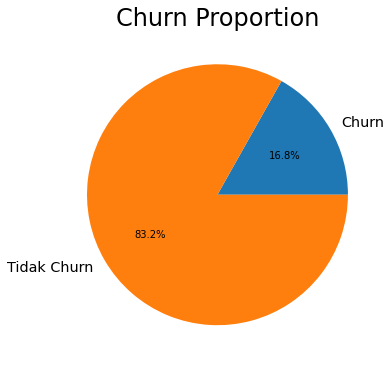

In [ ]:
A=['Churn', 'Tidak Churn']
T=[16.84, 83.16]
  
plt.pie(T, labels=A,autopct= '%1.1f%%')
plt.title('Churn Proportion', size = 24)
plt.show()

## <b> 1. Descriptive Statistics

informasi general tentang dataframe

In [ ]:
df_stg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
print('Data yang duplikat = ', df_stg1.duplicated().sum())

Data yang duplikat =  0


<b> Kolom yang memiliki Missing value

In [ ]:
df_stg1.isna().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

<b> Pengamatan:
1. Data terdiri dari 5630 baris dengan total 20 kolom
2. Terdapat null/missing values pada kolom: `DaySinceLastOrder`,`OrderAmountHikeFromlastYear`,`Tenure`,`OrderCount`,`CouponUsed`,`HourSpendOnApp`,`WarehouseToHome`
3. Untuk tipe data churn, ada baiknya seharusnya bertipe boolean. akan tetapi dalam case ini tidak terlalu mengganggu proses pengolahan data nantinya. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (<b> Semua tipe data sudah sesuai)
4. Tidak ada duplicate data antar baris.

### UNDERSTAND THE DATA
- Customer ID ---> berisikan ID unik dari customer
- Churn ----> Churn atau tidak?
- Tenure ---> Berapa lama customer menggunakan layanan (loyalitas) (bulan)
- PreferredloginDevice ---> customer login dengan device komputer, handphone dll
- CityTier ---> Tingkatan kota (1,2,3)
- WareHousetoHome ---> jarak gudang (waregouse) e commercenya ke rumah pelanggan
- PreferredPaymentMod ---> Metode pembayaran yang lebih dipilih untuk digunakan
- Gender ---> jenis kelamin
- HourSpendOnApp ---> waktu yang dihabiskan untuk menjelajah di aplikasi (dalam jam)
- Number of Device Registerd -----> Jumlah total perangkat yang terdaftar
- PreferedOrderCat ---> kategori produk yang sering diorder
- SatisfactionScore ----> tingkat kepuasan
- MaritalStatus ----> status pernikahan
- NumberOfAddress  ---> Jumlah alamat yang ditambahkan customer 
- OrderAmountHikeFromlastYear -----> Kenaikan Jumlah Pesanan Dari Tahun Lalu
- Complain -----> complain atau tidak?
- CouponUsed ----> Jumlah total Kupon yang telah digunakan bulan lalu
- OrderCount ----> jumlah orderan bulan lalu
- DaySinceLastOrder -----> Jarak hari ini dengan hari terakhir/rentang waktu customer order pesanan. 
- CashbackAmount ----> Jumlah cashback bulan lalu

In [ ]:
df_stg1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [ ]:
percentage_of_null_values = ((df_stg1.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
CustomerID                     0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
Churn                          0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64

<b> Untuk kolom/feature yang memiliki missing value, karena nilai null > 5% data, maka akan dilakukan imputation berdasarkan sebaran/distribusi datanya. jika data skew ke kanan (mean>median), maka digunakan nilai median karena nilai median robust terhadap outlier. atau opsi lain, digunakan nilai IQR (Q3-Q1) yang juga robust terhadap outlier. 

#### <b> Data Snippet

In [ ]:
df_stg1.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5252,55253,0,19.0,Phone,1,35.0,COD,Male,4.0,4,Mobile Phone,1,Married,6,0,21.0,2.0,2.0,4.0,146.32
5148,55149,0,15.0,Computer,1,29.0,Debit Card,Female,4.0,4,Laptop & Accessory,1,Married,5,1,15.0,3.0,4.0,4.0,179.67
4521,54522,0,14.0,Phone,1,17.0,Debit Card,Female,3.0,2,Mobile Phone,3,Married,5,1,14.0,1.0,2.0,8.0,147.13
2611,52612,0,NaN,Phone,1,15.0,Debit Card,Male,3.0,3,Mobile,5,Married,2,0,20.0,0.0,1.0,4.0,122.89
1007,51008,0,13.0,Phone,3,20.0,Debit Card,Female,2.0,3,Laptop & Accessory,5,Married,2,0,15.0,0.0,1.0,2.0,146.39


### STATISTICAL SUMMARY

#### <b> Grouping by Data Variable Type (Pick + Separate Columns)

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Tenure','CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore', 'DaySinceLastOrder','NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'CashbackAmount']
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

<b> A. DATA NUMERICAL

In [ ]:
df_stg1[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00


Beberapa kolom/feature sudah cukup simetrik distribusinya (mean dan median tidak terlalu jauh), namun ada beberapa kolom yang  skew, dilihat dari nilai mean dan median ---->        "mean>median" = skew ke kanan (akan kita lihat visualisasi nya di bawah) yaitu kolom `Tenure`, `WareHouseToHome`, `OrderCount`,`DaySinceLastOrder`,`CashbackAmount`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`  dst .

<b> B. DATA CATEGORICAL

In [ ]:
df_stg1[cats].describe().transpose()

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [ ]:
df[nums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       5366 non-null   float64
 1   CityTier                     5630 non-null   int64  
 2   WarehouseToHome              5379 non-null   float64
 3   HourSpendOnApp               5375 non-null   float64
 4   NumberOfDeviceRegistered     5630 non-null   int64  
 5   SatisfactionScore            5630 non-null   int64  
 6   DaySinceLastOrder            5323 non-null   float64
 7   NumberOfAddress              5630 non-null   int64  
 8   OrderAmountHikeFromlastYear  5365 non-null   float64
 9   CouponUsed                   5374 non-null   float64
 10  OrderCount                   5372 non-null   float64
 11  CashbackAmount               5630 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 527.9 KB


In [ ]:
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PreferredLoginDevice  5630 non-null   object
 1   PreferredPaymentMode  5630 non-null   object
 2   Gender                5630 non-null   object
 3   PreferedOrderCat      5630 non-null   object
 4   MaritalStatus         5630 non-null   object
dtypes: object(5)
memory usage: 220.0+ KB


#### <b> Value Counting

In [ ]:
for col in cats:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count column PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count column Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count column PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count column MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



<b> Untuk Tipe data categorical, sekilas tidak ada yang aneh untuk descripstive statistic nya. akan tetapi jika divisualisasikan (di Univariate analysis), akan terdapat beberapa kateogori yang sebenarnya 1 pengertian, tapi justru dibuat 2 definisi. contoh : CC dan credit card pada fitur metode pembayaran, COD dan Cash on Delivery pada kolom PreferredPaymentMode. selengkapnya akan dibahas di preprocessing. 

## <b> 2. Univariate Analysis

In [ ]:
df_stg1_1 = df_stg1.copy()

In [ ]:
df_stg1_1.drop(['CustomerID'], axis=1, inplace=True) #apakah kolom perlu di hapus disini? karna akan dijadikan target saat proses pemodelan?

In [ ]:
df_stg1_1.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df_stg1_1.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


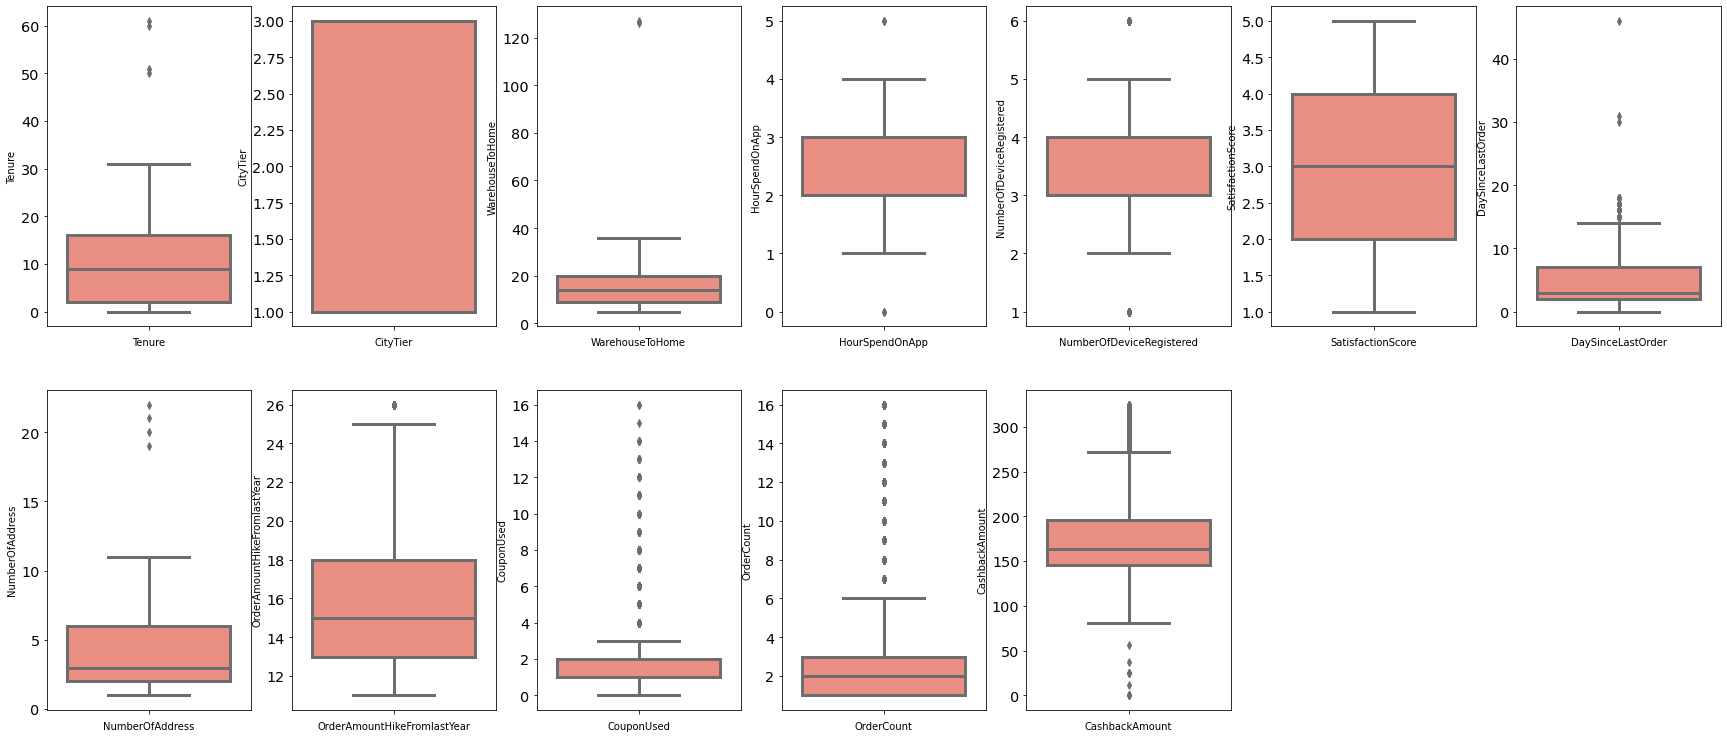

In [ ]:
plt.figure(figsize=(30,20))
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df_stg1[features[i]], color='salmon', orient='v')
    plt.xlabel(features[i])

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom `CouponUsed`, `OrderCount` dan `CashbackAmount`
* Outlier yang tidak terlalu banyak ada pada kolom `Tenure`, `WareHouseToHome`, `TimeSpendOnApp`, `NumberOfDeviceRegistered`, `OrderAmountHikeFromLastYear`
* Dari boxplotnya juga tampak mana distribusi yang terlihat *skewed*: `Tenure`, `Couponused`, `OrderCount`                                       dan agak skewed --> `OrderAmountHikeFromlastYear` 
* Beberapa kolom sudah memiliki data distribution yang cukup baik/normal, seperti `HourSpendOnApp`, `NumberOfDeviceRegister`dan `SatisfactionScore`

<b> Outlier ini nantinya dapat di "Handle" dengan Dua opsi, yaitu 
1. Menghapus Outlier berdasarkan IQR 
2. Menghapus Outlier berdasarkan Z-Score (untuk outlier yang ekstrim ----> pada data dengan sebaran/distribusi normal,, sekitar ~0,3%). 
disclaimer, metode IQR tidak disarankan karena dapat meghapus outlier dalam jumlah yang sangat ekstrim, yang bahkan dapat mengilangkan data > 5%. Oleh karena itu, dalam kasus ini digunakan metode Z-score saja dalam menangani outlier

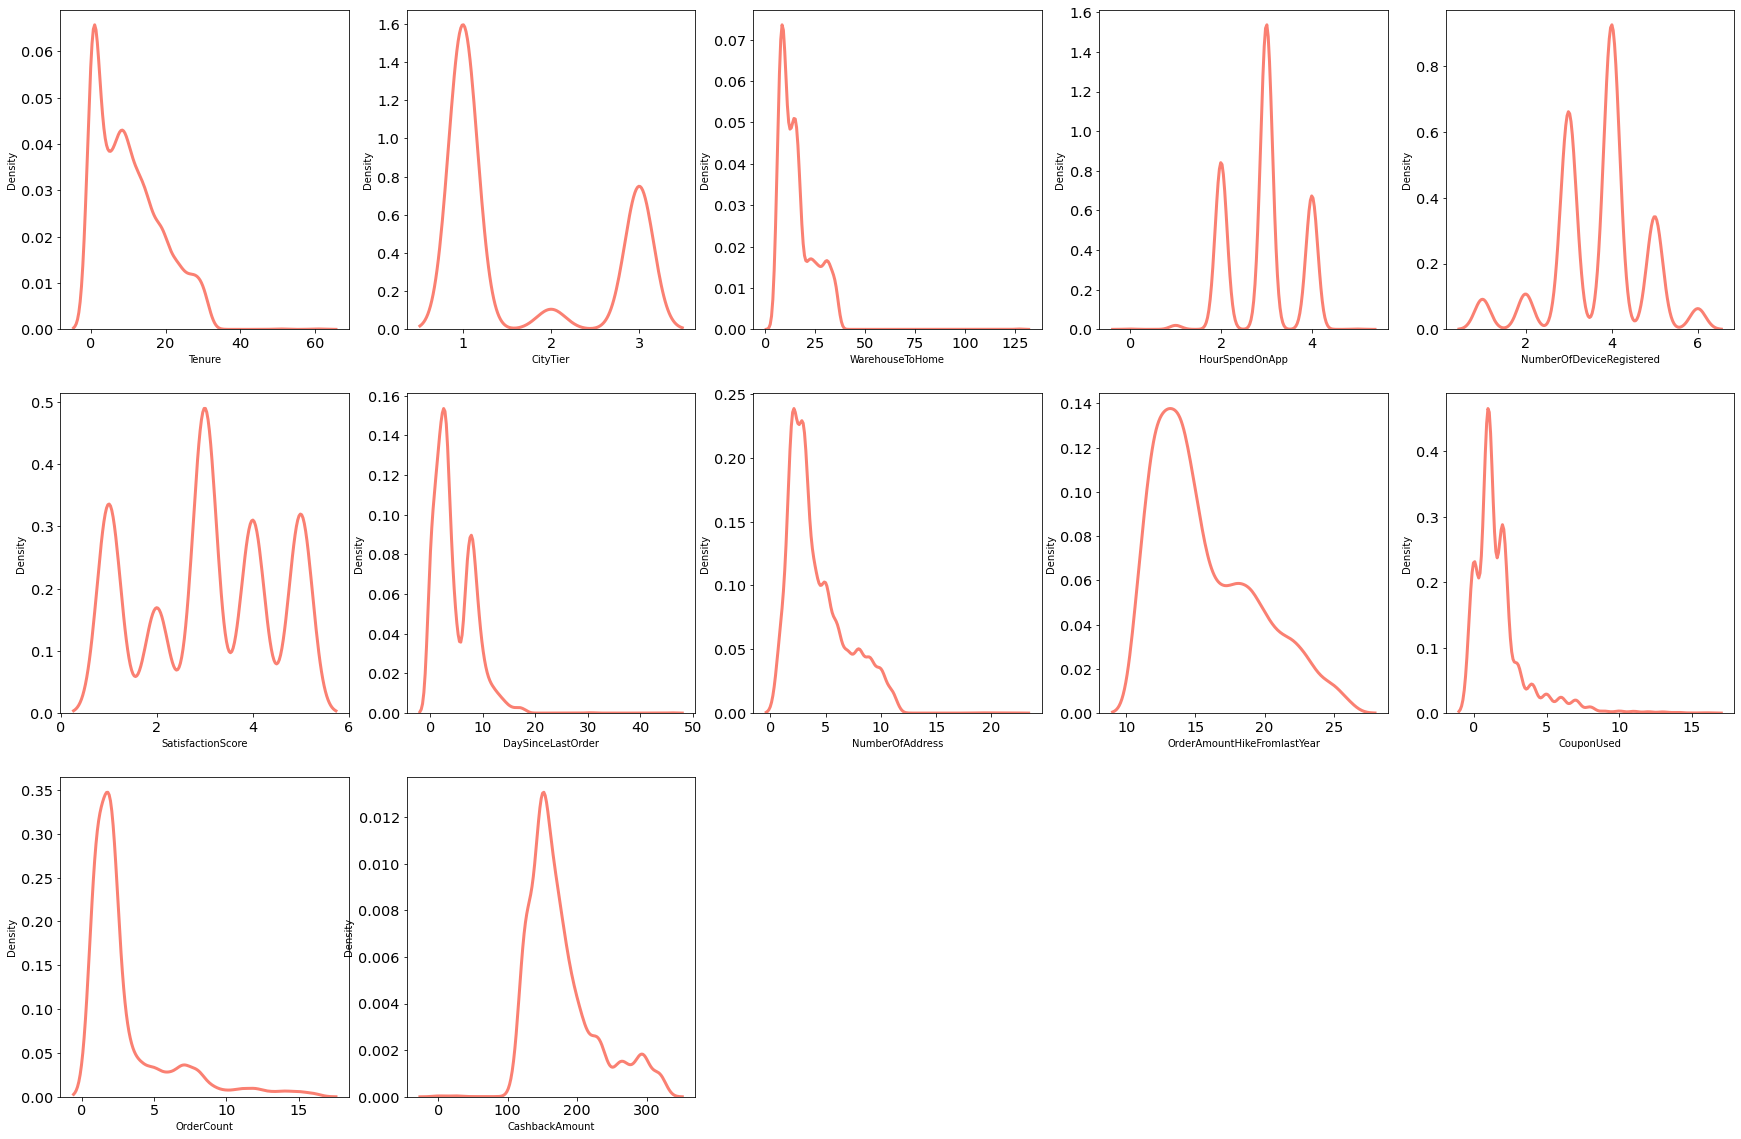

In [ ]:
features = nums
plt.figure(figsize=(30, 20))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df_stg1[features[i]], color='salmon')
    plt.xlabel(features[i])

grafik yang menarik dari data numeric adalah :
1. tenure : right skewed, ada outlier disisi kanan
2. CityTier : Normal (range 1-3). 
3. warehouse to home : right skewed, ada outlier disisi kanan
4. HourSpendOnapp : Normal, ada outlier di kiri dan kanan
5. NumberOfDeviceRegistered : Normal, ad outlier di kiri dan kanan
6. SatisfactionScore : Normal, tidak ada outlier (range 1-5)
7. days since last order : right skewed, ada outlier disisi kanan
8. number of address : right skewed, ada outlier disisi kanan
9. Order Amount Hike From last Year : right skewed, ada outlier disisi kanan
10. Coupon Used: right skewed, ada outlier disisi kanan
11. Order Count : right skewed, ada outlier disisi kanan
12. cashback amount : right skewed, ada outlier di sisi kiri dan kanan

<b> Untuk data dengan distribusi skew ke kanan, dapat diolah dengan "Feature Transformation", tepatnya dengan standarisasi maupun Log Transformation agar sebaran data menjadi normal. 

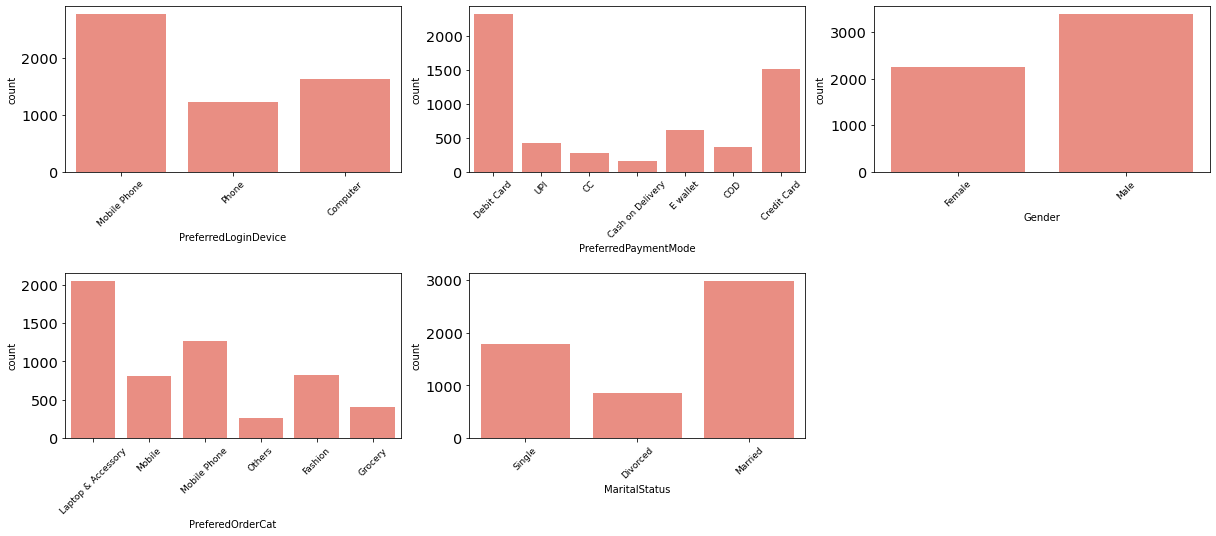

In [ ]:
plt.figure(figsize=(17,10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df_stg1[cats[i]], color='salmon', orient='v')
    plt.xticks(fontsize=9, rotation=45)
    plt.tight_layout()

1. pada feature Prefer Order Cat terdapat 2 kategori yang mirip yaitu, Phone dan Mobile Phone jika kategori tersebut sama, Phone akan direplaace dengan Mobile Phone.
2. Pada Feature Preferred Payment Mode, terdapat variabel yang mirip, yaitu CC dengan Credit Card dan COD dengan Cash On Delivery. CC akan direplace dengan credit card dan COD akan direplae oleh Cash On Delivery.
3. Pada feature PreferedOrderCat terdapat dua kategori yang ambigu, yaitu mobile dan Mobile Phone yang sebenarnya sama. Mobile akan direplace dengan Mobile Phonee. 

## <b> 3. Multivariate Analysis

In [ ]:
df_stg1_1.corr()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525
OrderAmountHikeFromlastYear,-0.010058,0.005825,-0.031408,0.038795,0.106843,0.069475,-0.027730,0.015533,-0.004529,1.000000,0.033201,0.023101,0.006003,0.017869


Text(0.5, 1.0, 'Korelasi')

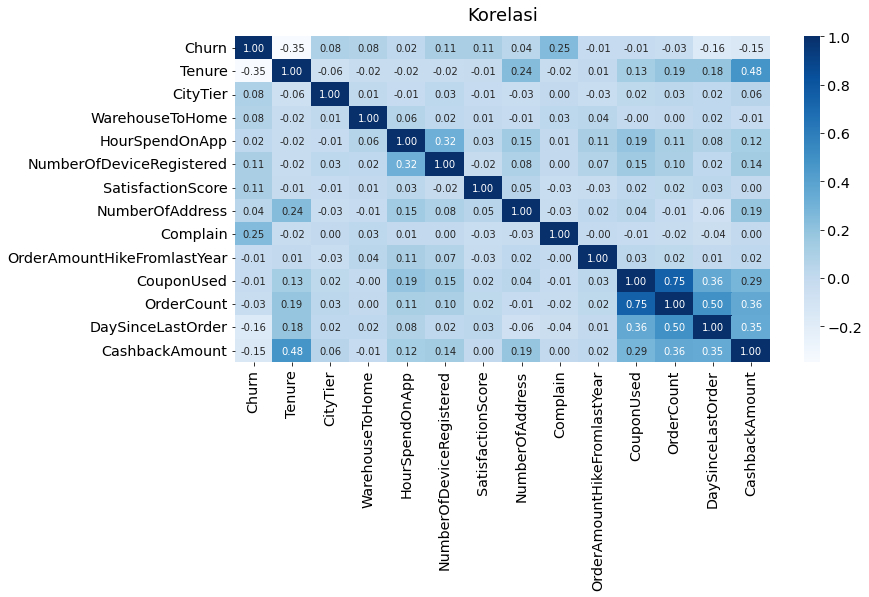

In [ ]:
#mask = np.triu(np.ones_like(df_stg1[nums].corr(), dtype=np.bool_))
heatmaps=sns.heatmap(df_stg1_1.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

##### Dari correlation heatmap diatas, ada beberapa feature yang memilki korelasi lemah dengan target kita (Churn), yaitu :

1. number of Device Registration 0.11
2. satisfaction Score 0.11
3. complain 0.25
4. tenure -0.35 (kuat, tetapi korelasi negatif). feature ini akan menjadi feature penting dalam model
5. Days Since Last Order -0.16
6. CashbackAmount -0.15

#####  Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `churn` korelasi positif lemah dengan `complain`, `SatisfactionScore`, `NumberOfDeviceRegistered` dan `CityTier` (decent potential feature)
* Sedangkan korelasi `Churn` dengan `HourSpendOnApp` dan `NumberOfAddress`, `CouponUsed`, `OrderAmountHikeFromLastyear` dan `OrderCount` sangat lemah ~0, ini menandakan bisa jadi mereka bukan fitur yang potensial
* `Tenure` memiliki korelasi positif cukup kuat dengan `CashbackAmount`(0.48); `CustomerID` dengan `HourSpendOnApp` (0.6) ; `CouponUsed` dengan `OrderCount`(0.75), `OrderCount` dengan `DaySinceLastOrder` (0.5), Ada kemungkinan *feature* ini redundan (dipilih salah satunya saja untuk training data)

##### Korelasi lainnya 
1. `Churn` berkorelasi negatif dengan `tenure` (korelasi = -0.35), artinya Churn cenderung terjadi pada customer dengan loyalitas yang rendah atau tidak terlalu lama menggunakan layanan. 
2. `Tenure` berkorelasi positif kuat dengan `CashbackAmount`(0.48). Artinya loyalitas dari customer dipengaruhi oleh jumlah cashback yang diberikan oleh E-commerce.  
3. `CashbackAmount` berkorelasi positif dengan `OrderCount`(0.36) dan `DaySinceLastOrder` (0.35). Tentu saja Pemberian dan jumlah cashback sangat mempengaruhi jumlah belanja atau jumlah orderan customer. 
4. `OrderCount` Berkorelasi positif kuat dengan `CouponUsed` (0.75)
5. `CouponUsed` berkorelasi positif dengan `DaySinceLastOrder` (0.36)

## <b> 4. Business Insight

### 1. Churn Berdasarkan Tenure

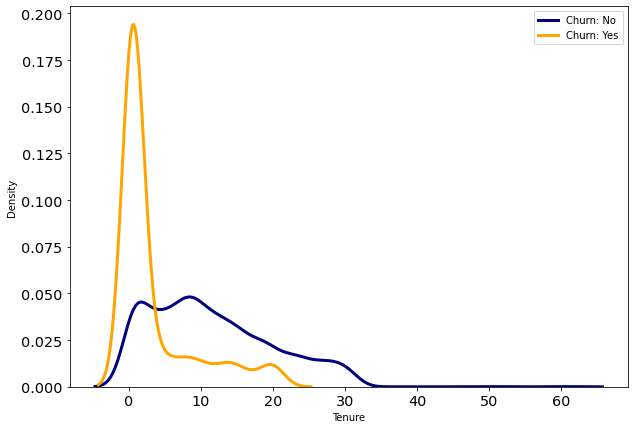

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(df_stg1[df_stg1['Churn']==0]['Tenure'].dropna(),color='navy',label='Churn: No', ax=ax)
sns.kdeplot(df_stg1[df_stg1['Churn']==1]['Tenure'].dropna(),color='orange',label='Churn: Yes', ax=ax)
plt.legend() ; 

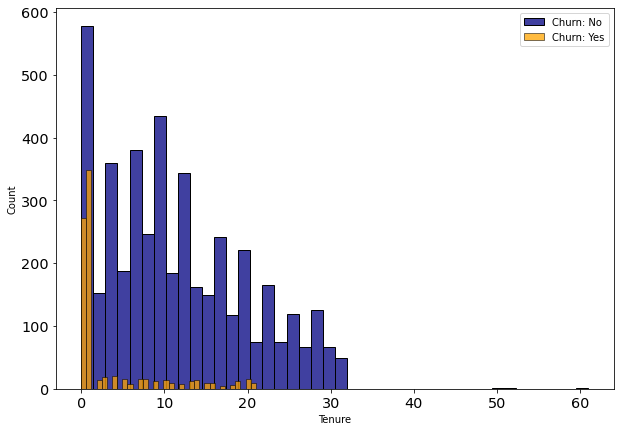

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(df_stg1[df_stg1['Churn']==0]['Tenure'].dropna(),color='navy',label='Churn: No', ax=ax)
sns.histplot(df_stg1[df_stg1['Churn']==1]['Tenure'].dropna(),color='orange',label='Churn: Yes', ax=ax)
plt.legend()

<b> INSIGHT :
Churn cenderung terjadi pada customer dengan loyalitas yang rendah atau belum terlalu lama menggunakan layanan. kemungkinan customer dengan loyalitas rendah ini adalah customer yang hanya menikmati flash sale atau promo singkat, dll. Perlu dibuat fitur baru dalam layanan e-commerce seperti 'Gaining Poin or Coin' atau game mengumpulkan coin/poin tersebut yang nantinya dapat ditukar dengan voucher diskon, gratis ongkir dan lain sebagainya. sehingga dengan adanya fitur ini, dapat meningkatkan experience dari customer. 

### 2. Kategori Produk yang Paling Banyak Diminati

In [ ]:
df_pref_order = df_stg1.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'count'}).reset_index()
df_pref_order['ratio']=df_pref_order['CustomerID'].apply(lambda x:round( x*100.0/(df_pref_order['CustomerID'].sum()),2))
df_pref_order

,PreferedOrderCat,Churn,CustomerID,ratio
0,Fashion,0,698,12.40
1,Fashion,1,128,2.27
2,Grocery,0,390,6.93
3,Grocery,1,20,0.36
4,Laptop & Accessory,0,1840,32.68
5,Laptop & Accessory,1,210,3.73
6,Mobile,0,589,10.46
7,Mobile,1,220,3.91
8,Mobile Phone,0,921,16.36
9,Mobile Phone,1,350,6.22


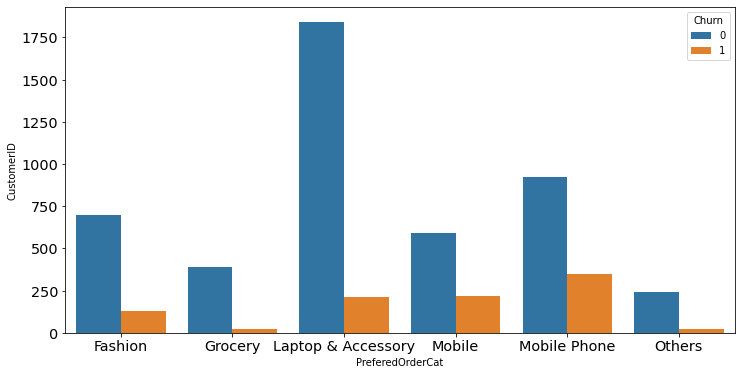

In [ ]:
sns.barplot(x='PreferedOrderCat', y='CustomerID',hue='Churn', data=df_pref_order);

<b> Kategori laptop & accessory dan mobile Phone menjadi yang paling banyak diburu. untuk kategori barang yang ingin dijual perlu ditingkatkan lagi atau diseimbangkan lagi. Seperti contohnya untuk fashion, dengan meningkatkan jumlah customer wanita diharapkan penjualan barang dengan kategori Fashion ini dapat ditingkatkan. atau barang dengan kategori others, dengan melakukan marketing campaign seperti flash sale diharapkan mampu menaikkan popularitas barang ini dan meningkatkan penjualannya, sehingga penjualan tidak hanya terfokus pada satu kategori saja.
  

### 3. Churn Berdasarkan Gender

In [ ]:
df_group = df_stg1.groupby(['Gender','Churn']).agg({'CustomerID':'count'}).reset_index()
df_group['ratio']=df_group['CustomerID'].apply(lambda x:round( x*100.0/(df_group['CustomerID'].sum()),2))
df_group

,Gender,Churn,CustomerID,ratio
0,Female,0,1898,33.71
1,Female,1,348,6.18
2,Male,0,2784,49.45
3,Male,1,600,10.66


In [ ]:
df_gender = df_stg1.groupby(['Churn', 'Gender']).agg({'CustomerID':'count'}).reset_index()
df_churn = df_stg1.groupby('Churn').agg({'CustomerID':'count'}).reset_index()
df_gender_intotal = df_gender.merge(df_churn, on = 'Churn', how = 'left')
df_gender_intotal['Rasio (%)'] = df_gender_intotal['CustomerID_x']/df_gender_intotal['CustomerID_y']*100
df_gender_intotal

,Churn,Gender,CustomerID_x,CustomerID_y,Rasio (%)
0,0,Female,1898,4682,40.538232
1,0,Male,2784,4682,59.461768
2,1,Female,348,948,36.708861
3,1,Male,600,948,63.291139


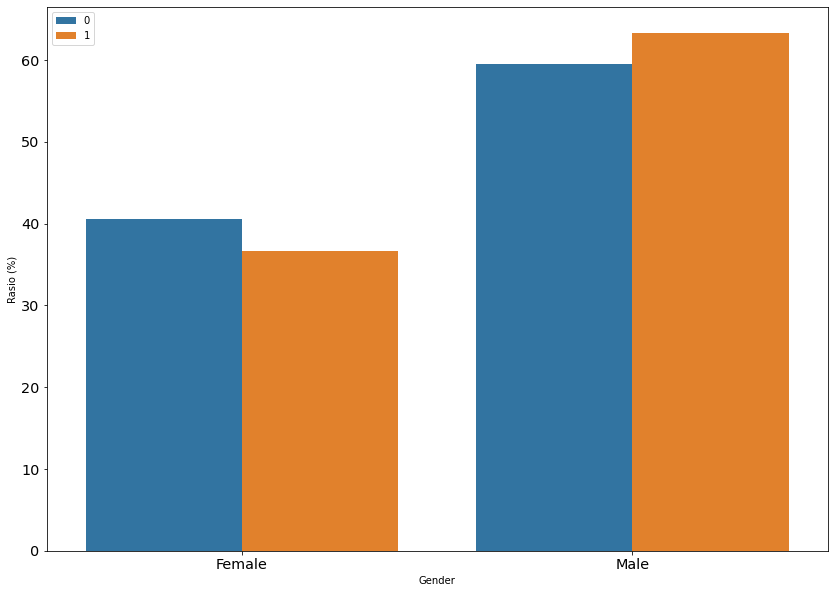

In [ ]:
plt.figure(figsize = (14,10))
sns.barplot(x='Gender', y='Rasio (%)', hue='Churn', data=df_gender_intotal)
plt.legend()

<b> Jumlah Customer pria lebih banyak dibandingkan wanita, Jumlah customer pria yang chun juga lebih banyak dari wanita. Menurut artikel yang dikutip dari mag for woman, Wanita lebih suka berbelanja dan merupakan customer yang lebih baik dibandingkan pria. Salah satu alasan wanita menyukai 'shopping' atau berbelanja adalah naluri wanita yang selalu ingin mengumpulkan sesuatu. Pada case ini, jumlah customer wanita lebih sedikit dibandingkan pria, tetapi persentase yang churn justru lebih sedikit dari pria karena wanita memang lebih setia dalam hal berbelanja. Sedangkan pria dalam hal ini kemungkinan mereka hanya mengejar promo dan cashback dari e-commerce ketika berbelanja. Perlu dilakukan marketing campaign untuk menarik wanita dan menambah produk2 yang dapat menarik wanita untuk berbelanja pada platform kita.
 

### 4. Churn Berdasarkan Complain

In [ ]:
df_group2 = df_stg1.groupby(['Complain','Churn']).agg({'CustomerID':'count'}).reset_index()
df_group_complain = df_stg1.groupby('Complain').agg({'CustomerID':'count'}).reset_index()

In [ ]:
data_complain = df_group2.merge(df_group_complain, on = 'Complain', how = 'left')
data_complain['Rasio (%)'] = data_complain['CustomerID_x']/data_complain['CustomerID_y']*100
data_complain

,Complain,Churn,CustomerID_x,CustomerID_y,Rasio (%)
0,0,0,3586,4026,89.071038
1,0,1,440,4026,10.928962
2,1,0,1096,1604,68.329177
3,1,1,508,1604,31.670823


Text(0.5, 1.0, 'Complain X Churn')

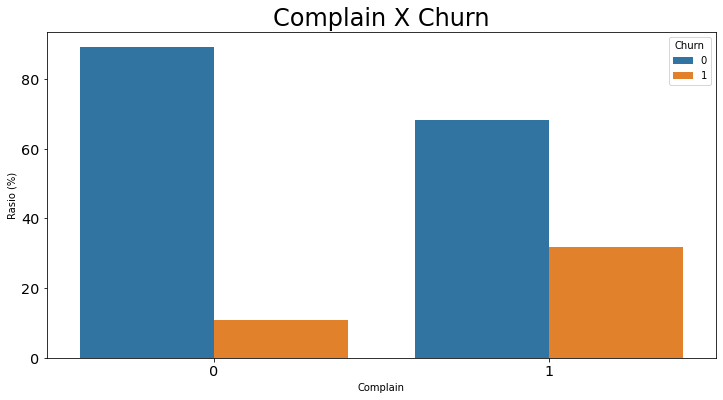

In [ ]:
conc1= "Persentase Customer  yang Churn dilihat dari Complain"
sns.barplot(x='Complain', y='Rasio (%)', hue='Churn', data=data_complain)
plt.title('Complain X Churn', size = 24)

<b> Customer yang melakukan complain memiliki persentase 31.67% terhadap customer yang churn sehingga dibutuhkan perbaikan dalam penanganan complain (resolve complain). Jika komplain mereka tidak ditangani dengan baik, maka potensi customer yang complain dan belum churn akan churn pada waktunya karena faktor ketidakpuasan terhadap layanan kita. Solusinya adalah bisa dengan membuat sistem bot untuk mengarahkan customer secara otomatis dan realtime bagaimana cara mengatasi masalah yang memang masih bisa diselesaikan oleh customer sendiri. Kemudian juga membuat fast call service untuk penanganan masalah yang kompleks dengan cepat. 
 

### 5. Tenure vs Cashback Amount

In [ ]:
df_copy = df_stg1.copy()

In [ ]:
klasifikasi = []

for i, kolom in df_copy.iterrows():
    if kolom ['Tenure'] <= 9: 
        result = 'New User  dengan Tenure <=9 bulan'
    elif kolom ['OrderCount'] > 9 and kolom ['OrderCount'] <=20 : 
        result = 'Experienced User dengan Tenure 10-20 bulan'
    else :
        result = 'Loyal User dengan Tenure >20 bulan'
    klasifikasi.append(result)
df_copy['Klasifikasi Berdasarkan Tenure']=klasifikasi
df_copy.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Klasifikasi Berdasarkan Tenure
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,New User dengan Tenure <=9 bulan
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,Loyal User dengan Tenure >20 bulan
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,Loyal User dengan Tenure >20 bulan
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,New User dengan Tenure <=9 bulan
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,New User dengan Tenure <=9 bulan


In [ ]:
df_tn = df_copy.groupby(['Klasifikasi Berdasarkan Tenure', 'Churn']).agg({'CustomerID' : 'count',
                              'CashbackAmount' : 'sum'})
df_cashback = df_stg1['CashbackAmount'].sum()
df_tn['Rasio(%)'] = df_tn['CashbackAmount']/df_cashback*100
df_tn = df_tn.reset_index()
df_tn = df_tn.rename(columns = {'CustomerID' : 'Jumlah Customer'})
df_tn

,Klasifikasi Berdasarkan Tenure,Churn,Jumlah Customer,CashbackAmount,Rasio(%)
0,Experienced User dengan Tenure 10-20 bulan,0,202,49479.54,4.959034
1,Experienced User dengan Tenure 10-20 bulan,1,12,2837.82,0.284417
2,Loyal User dengan Tenure >20 bulan,0,2340,447718.06,44.872065
3,Loyal User dengan Tenure >20 bulan,1,195,31482.57,3.155307
4,New User dengan Tenure <=9 bulan,0,2140,348536.42,34.931691
5,New User dengan Tenure <=9 bulan,1,741,117711.25,11.797485


In [ ]:
df_tn2 = df_copy.groupby('Klasifikasi Berdasarkan Tenure').agg({'CustomerID' : 'count',
                              'CashbackAmount' : 'sum'})
df_tn2 = df_tn2.reset_index()
df_tn2 = df_tn2.rename(columns = {'CustomerID' : 'Jumlah Customer'})
df_tn2

,Klasifikasi Berdasarkan Tenure,Jumlah Customer,CashbackAmount
0,Experienced User dengan Tenure 10-20 bulan,214,52317.36
1,Loyal User dengan Tenure >20 bulan,2535,479200.63
2,New User dengan Tenure <=9 bulan,2881,466247.67


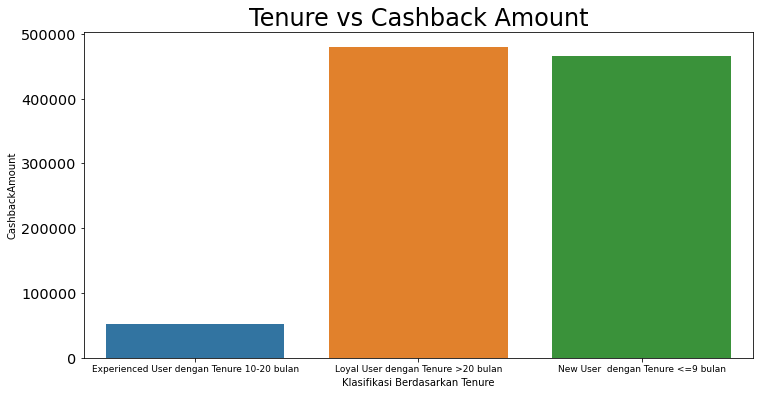

In [ ]:
sns.barplot(x='Klasifikasi Berdasarkan Tenure', y='CashbackAmount', data=df_tn2, estimator=sum)
plt.title('Tenure vs Cashback Amount', size = 24)
plt.xticks(fontsize=9);

User dengan kategori new user atau dengan lama menggunakan layanan <= 9 bulan adalah customer dengan jumlah paling banyak. sedangkan experienced user dengan tenure 10-20 bulan adalah yang paling sedikit. Jumlah cashback (secara jumlah keseluruhan) yang digunakan paling banyak adalah customer dengan kategori loyal user (customer dengan tenure > 20 bulan). 

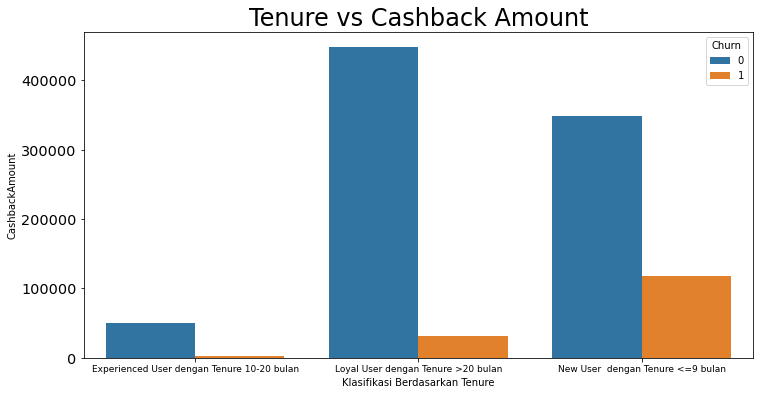

In [ ]:
sns.barplot(x='Klasifikasi Berdasarkan Tenure', y='CashbackAmount', data=df_tn, estimator=sum, hue='Churn')
plt.title('Tenure vs Cashback Amount', size = 24)
plt.xticks(fontsize=9);

Customer dengan kategori 'new user' atau user dengan lama menggunakan layanan <=9 bulan adalah yang paling banyak churn dan mereka juga banyak menggunakan cashback. Hal ini kemungkinan karena customer baru ini hanya ingin menikmati cashback yang disediakan oleh e-commerce. Sebaiknya dibuat klasifikasi user berdasarkan lama nya menggunakan layanan e-commerce kita, agar lebih mudah menargetkan pemberian cashback terhadap customer. cashback sebaiknya diberikan untuk kategori experience user dan loyal user. sedangkan New user sebaiknya dibuat strategi lain untuk meningkatkan retensinya selain dengan memberikan cashback seperti fitur gaining point, games tabur tuai (contoh farming untuk mendapatkan coin/poin) dan lain sebagainya. 

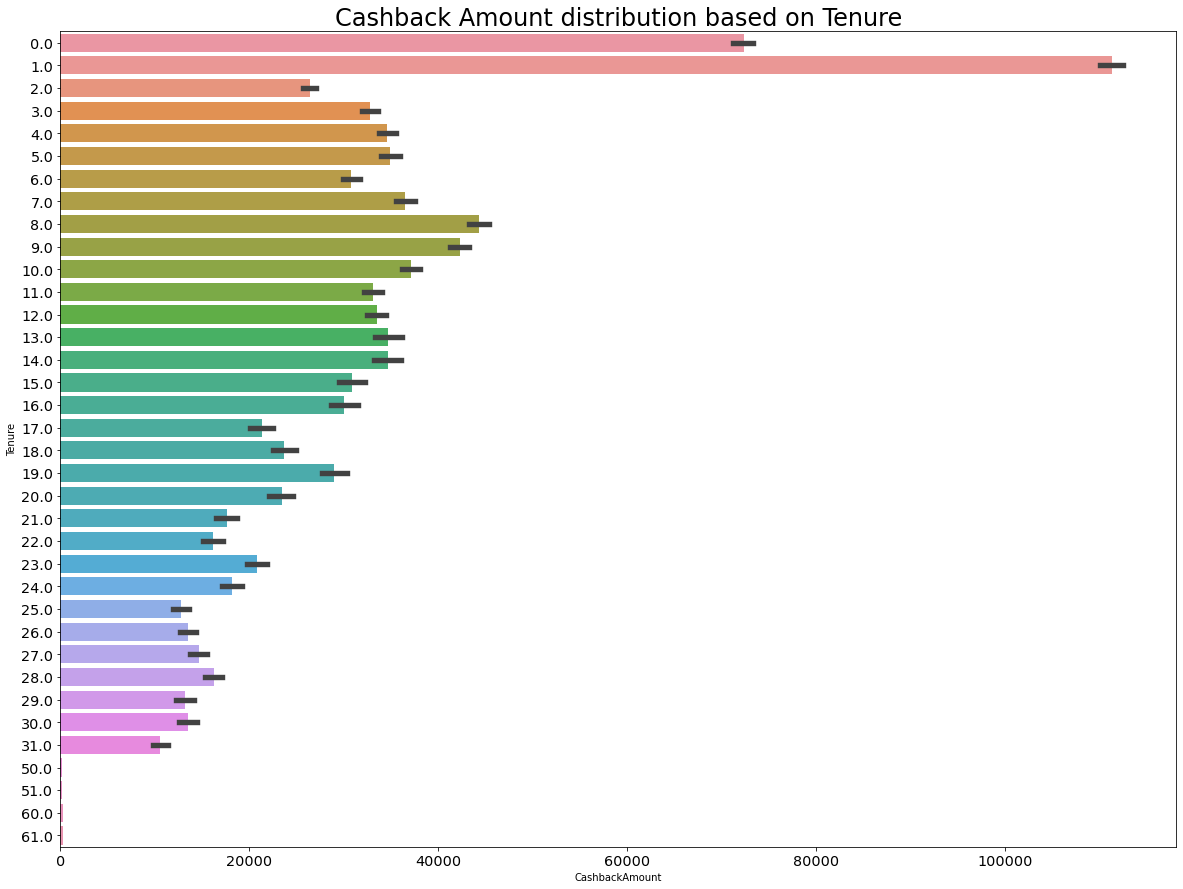

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x='CashbackAmount', y='Tenure', data=df_stg1, estimator =sum, orient ='h')
plt.title('Cashback Amount distribution based on Tenure', size = 24);

Jika dilihat dari jumlah cashbackamount yang digunakan, cashback paling banyak diperoleh oleh customer dengan tenure 0-1 bulan. Tindakan ini dilakukan dalam melakukan akusisi pelanggan baru. 

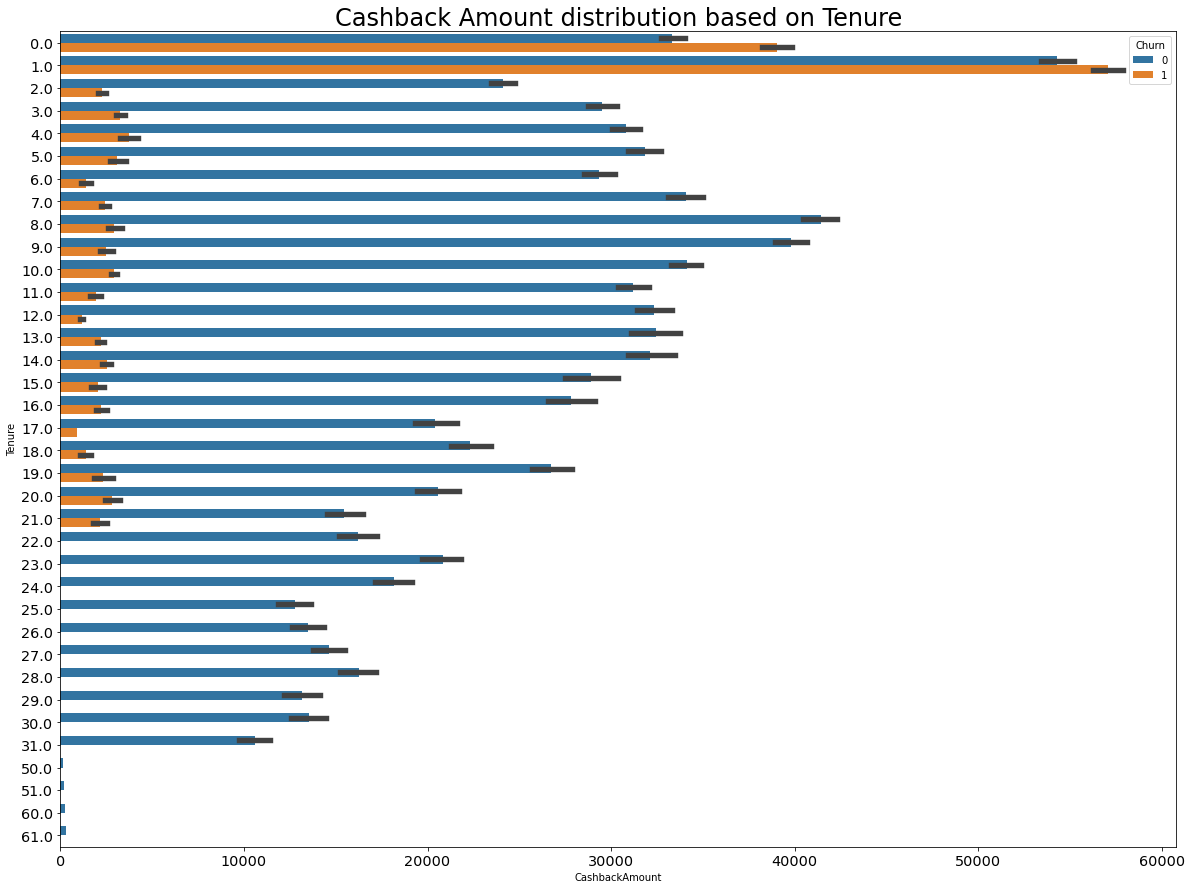

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x='CashbackAmount', y='Tenure', data=df_stg1, estimator =sum, hue ='Churn', orient ='h')
plt.title('Cashback Amount distribution based on Tenure', size = 24);

Mayoritas dari customer yang menggunakan cashback adalah customer dengan lama menggunakan layanan kita kurang dari 21 bulan dan customer yang sudah memperoleh cashback lebih cenderung churn. Fenomena ini bisa menjadi pertimbangan dalam pemberian cashback kepada pelanggan. Sungguh disayangkan kita sudah mengalirkan dana operasional berupa cashback kepada pelanggan, dan pelanggan justru churn, karena pelanggan hanya ingin mengambil cashback selama melakukan pembelian di layanan e commerce kita. Terlihat jelas bahwa customer yang melakukan order hanya 1 kali, juga paling banyak menggunakan cashback. Kemungkinan memang customer ini hanya ingin mengambil keutungan berupa cashback yang besar sebagai new user. Untuk melakukan akusisi pelanggan baru, juga perlu mempertimbangkan bagaimana cara meningkatkan retensi mereka. Perlu adanya fitur farming/game yang hasilnya dapat ditukarkan dengan syarat, atau pengumpulan poin dari hasil pembelian produk dan lain-lain. dengan demikian, hal ini dapat meningkatkan retensi dan loyalitas dari new customer. 

### 6. Order Count vs Coupon Used

In [ ]:
df_order = df_copy.groupby('OrderCount').agg({'CouponUsed' : 'sum',
                      'CustomerID' : 'count'})
df_order.reset_index()
df_order = df_order.rename(columns = {'CustomerID' : 'Jumlah Customer'})
df_order

,CouponUsed,Jumlah Customer
OrderCount,,
1.0,854.0,1751
2.0,2846.0,2025
3.0,696.0,371
4.0,415.0,204
5.0,472.0,181
6.0,442.0,137
7.0,771.0,206
8.0,754.0,172
9.0,281.0,62


Text(0.5, 1.0, 'OrderCount vs Rata-rata kupon yang digunakan')

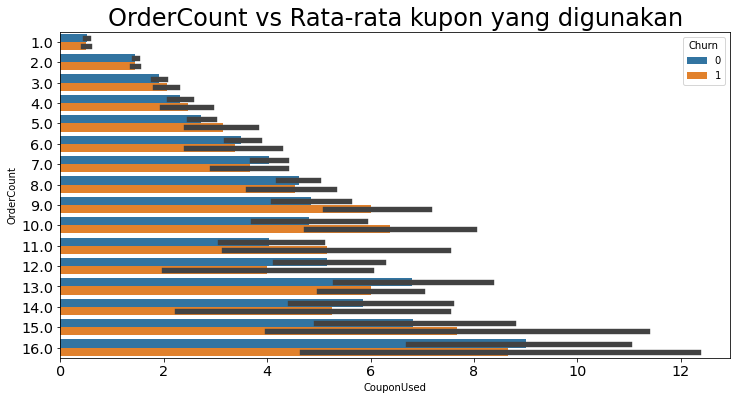

In [ ]:
sns.barplot(x='CouponUsed', y='OrderCount', data=df_stg1, estimator=np.mean, hue='Churn', orient ='h')
plt.title('OrderCount vs Rata-rata kupon yang digunakan', size = 24)

Semakin banyak jumlah pesanan/order, semakin banyak kupon yang digunakan oleh customer. Jadi, jumlah order produk itu sangat ditentukan oleh kupon yang kita berikan. Oleh karena itu, kita harus sering memberikan kupon kepada customer dengan mempertimbangkan ROI, BEP dll agar customer tetap setia dan rutin dalam melakukan pemesanan produk. 

### 7. CashbackAmount vs OrderCount

pelanggan juga dapat diklasifikasi dalam beberapa kategor berdasrarkan junlah ordernya. Bronze, Silver dan Gold. 

In [ ]:
klasifikasi = []

for i, kolom in df_copy.iterrows():
    if kolom ['OrderCount'] < 4: 
        result = 'Bronze'
    elif kolom ['OrderCount'] < 9 and kolom ['OrderCount'] >=4 : 
        result = 'Silver'
    else :
        result = 'Gold'
    klasifikasi.append(result)
df_copy['CustomerCategory']=klasifikasi
df_copy.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Klasifikasi Berdasarkan Tenure,CustomerCategory
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,New User dengan Tenure <=9 bulan,Bronze
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,Loyal User dengan Tenure >16 bulan,Bronze
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,...,Single,6,1,14.0,0.0,1.0,3.0,120.28,Loyal User dengan Tenure >16 bulan,Bronze
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,Single,8,0,23.0,0.0,1.0,3.0,134.07,New User dengan Tenure <=9 bulan,Bronze
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,...,Single,3,0,11.0,1.0,1.0,3.0,129.60,New User dengan Tenure <=9 bulan,Bronze


In [ ]:
df_oc = df_copy.groupby(['CustomerCategory', 'Churn']).agg({'CustomerID' : 'count',
                              'CashbackAmount' : 'sum'})
df_cashback = df_copy['CashbackAmount'].sum()
df_oc['Rasio(%)'] = df_oc['CashbackAmount']/df_cashback*100
df_oc.reset_index()
df_oc = df_oc.rename(columns = {'CustomerID' : 'Jumlah Customer'})
df_oc.reset_index()

,CustomerCategory,Churn,Jumlah Customer,CashbackAmount,Rasio(%)
0,Bronze,0,3393,576694.53,57.798595
1,Bronze,1,754,114254.16,11.451001
2,Gold,0,521,123132.15,12.340789
3,Gold,1,62,13595.06,1.362550
4,Silver,0,768,145907.34,14.623408
5,Silver,1,132,24182.42,2.423657


In [ ]:
df_oc2 = df_copy.groupby('CustomerCategory').agg({'CustomerID' : 'count',
                              'CashbackAmount' : 'sum'})
df_oc2.sort_values(['CustomerID'])
df_oc2 = df_oc2.reset_index()
df_oc2 = df_oc2.rename(columns = {'CustomerID' : 'Jumlah Customer'})
df_oc2

,CustomerCategory,Jumlah Customer,CashbackAmount
0,Bronze,4147,690948.69
1,Gold,583,136727.21
2,Silver,900,170089.76


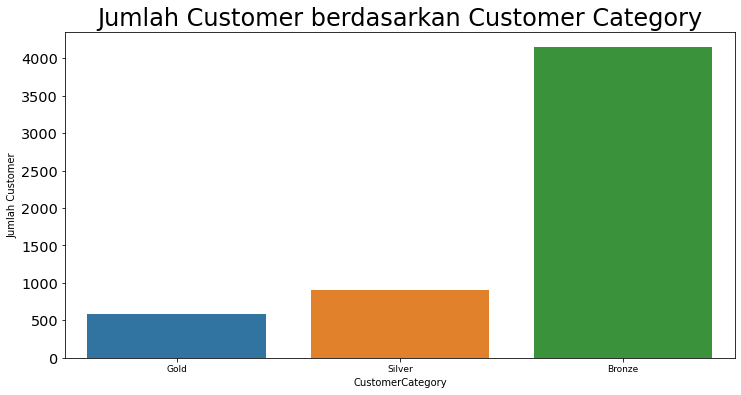

In [ ]:
sns.barplot(x='CustomerCategory', y='Jumlah Customer', data=df_oc2.sort_values(['Jumlah Customer'], ascending = True), estimator=sum)
plt.title('Jumlah Customer berdasarkan Customer Category', size = 24)
plt.xticks(fontsize=9);

Jika dilihat dari klasifikasi customer berdasarkan jumlah order count nya, customer yang memiliki jumlah pesanan kurang dari 4 (bronze) adalah yang paling banyak. dan customer dengan jumlah order lebih dari 9 (gold) adalah yang paling sedikit. Kita perlu meningkatkan keinginan customer untuk berbelanja lebih banyak agar meningkatkan revenue perusahaan. beberapa upaya yang dapat kita lakukan misalnya dengan memberikan cashback dan kupon kepada pelanggan yang memiliki jumlah pesanan dibawah 4 (bronze). 

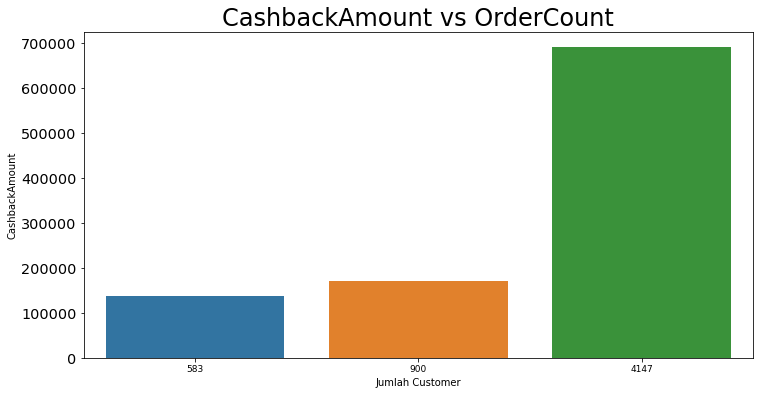

In [ ]:
sns.barplot(x='Jumlah Customer', y='CashbackAmount', data=df_oc2.sort_values(['CustomerCategory'], ascending = True), estimator=sum)
plt.title('CashbackAmount vs OrderCount', size = 24)
plt.xticks(fontsize=9);

Jumlah cashback paling banyak digunakan oleh customer kategori Bronze

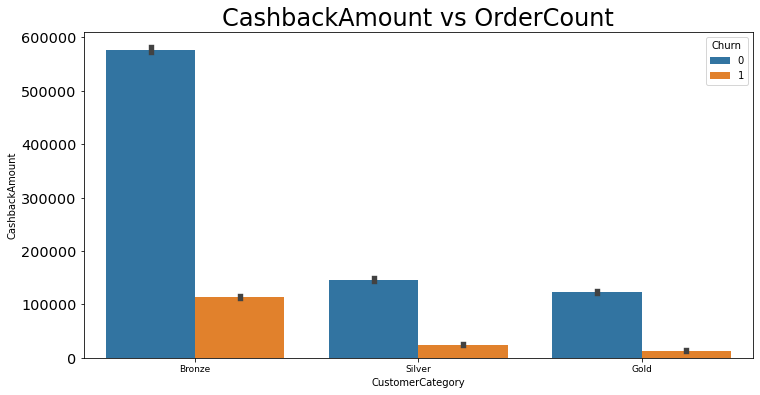

In [ ]:
sns.barplot(x='CustomerCategory', y='CashbackAmount', data=df_copy.sort_values(['CustomerID'], ascending = True), estimator=sum, hue='Churn')
plt.title('CashbackAmount vs OrderCount', size = 24)
plt.xticks(fontsize=9);

Pengguna Bronze yang menggunakan Cashback paling banyak Churn dibandingkan pengguna silver dan Gold. 

Text(0.5, 1.0, 'CashbackAmount vs OrderCount')

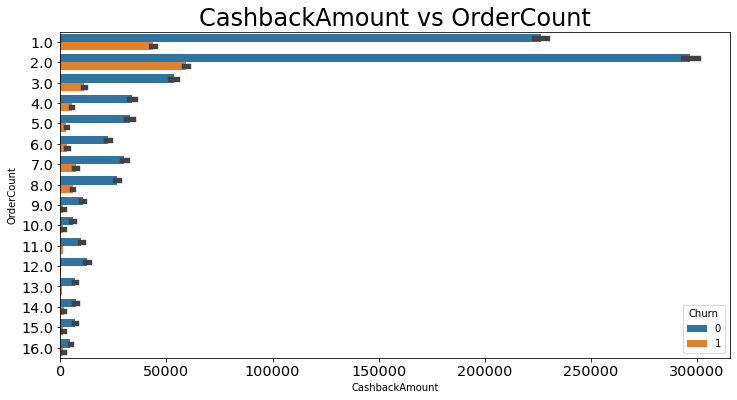

In [ ]:
sns.barplot(x='CashbackAmount', y='OrderCount', data=df_stg1,  estimator=sum, hue='Churn', orient ='h')
plt.title('CashbackAmount vs OrderCount', size = 24)

Jika dilihat berdasarkan jumlah order nya, pengguna dengan order yang sedikit, atau dapat dikatakan order count < 4 cenderung melakukan churn dibanding customer yang sudah melakukan banyak order/pesanan/pembelian produk. Customer yang memiliki ordercount 1-2 cenderung churn, karena pada masa ini adalah masa akusisi pelanggan baru. Perlu dilakukan strategi yang telah disebutkan di atas untuk meningkatkan retensi pelanggan dan experience dari user terhadap layanan e commerce kita. 

# Stage 2 - DATA PRE-PROCESSING

In [5]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## <B> 1. Data Cleansing

<b> GENERAL INFORMATION

In [6]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Statistical Summary

In [7]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Tenure','CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore', 'DaySinceLastOrder','NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'CashbackAmount']
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [8]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00


Beberapa kolom/feature sudah cukup simetrik distribusinya (mean dan median tidak terlalu jauh), namun ada beberapa kolom yang  skew, dilihat dari nilai mean dan median ---->        "mean>median" = skew ke kanan (akan kita lihat visualisasi nya di bawah) yaitu kolom `Tenure`, `WareHouseToHome`, `OrderCount`,`DaySinceLastOrder`,`CashbackAmount`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`  dst . kolom-kolom ini mungkin dapat dilakukan log transformation nantinya. 

In [9]:
df[cats].describe().transpose()

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


1. Customer di dominasi oleh pria. 
2. customer mayoritas lebih memilih login melalui mobile phone
3. metode pembayaran yang digunakan kebanyakan dengan metode debit card
4. kategori produk yang diorder mayoritas adalah laptop dan aksesoris
5. Mayoritas customer berstatus menikah.

### A. Handling Missing Values

Kita cek terlebih dahulu jumlah missing value pada dataset kita, dalam jumlah dan dalam persen

In [10]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [11]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
CustomerID                     0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
Churn                          0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64

<b> Note :
* Untuk kolom/feature yang memiliki missing value, karena nilai null > 5% data, maka akan dilakukan imputation berdasarkan sebaran/distribusi datanya. jika data skew ke kanan (mean>median), maka digunakan nilai median karena nilai median robust terhadap outlier. jika mean< median, digunakan nilai mean. 
* ada opsi lain untuk proses imputation ini, yaitu menggunakan nilai IQR (Q3-Q1) yang juga robust terhadap outlier. dalam case ini, kami hanya menggunakan nilai median dan mean saja. 

Berikut adalah strategi kita mengatasi missing values pada setiap kolom. 
<br>
INGAT: jikalau kita melakukan imputasi, maka itu mencerminkan ASUMSI kita.
* `DaySinceLastOrder` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)
* `OrderAmountHikeFromlastYear` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)
* `Tenure ` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)
* `OrderCount` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)
* `CouponUsed`\: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)
* `HourSpendOnApp`\: impute dengan nilai average (dari `df.describe` kita tau distribusinya mendekati normal)
* `WarehouseToHome`\: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)

##### PROSES IMPUTASI

In [12]:
# Impute DaySinceLastOrder, OrderAmountHikeFromlastYear, Tenure, OrderCount, CouponUsed, dan WarehouseToHome dengan median
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)

In [13]:
#missing value kolom `HourSpendOnApp` diisi dengan mean, karena pada deskriptif statistiknya mean<median. 
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean(), inplace=True)

<b> Dicek kembali missing value setelah proses imputation

In [14]:
# cek jumlah missing data setelah preprocessing
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Setelah dilakukan imputation, statistik deskriptif berubah, kita cek ulang

In [15]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.931535,0.705384,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,2.00,3.00,7.0000,46.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.716874,1.857640,0.0,1.00,1.00,2.0000,16.00


deskriptif statistik setelah proses imputasi tidak berubah secara signifikan. data setelah imputasi relatif masih mendekati nilai originalnya sebelum imputasi. 

### B. Duplicated Data

In [16]:
# cek jumlah duplicated rows
# dari semua kolom
print('Jumlah data yang duplikat adalah :', df.duplicated().sum())

Jumlah data yang duplikat adalah : 0


In [17]:
# cek jumlah duplicated rows --> COBA-COBA
# dari 3 kolom saja (CustomerID, Churn, Complain)
df.duplicated(subset=['CustomerID', 'Churn', 'Complain']).sum()

0

<b> Karena tidak ada data yang duplikat, maka selanjutnya dilakukan handling outliers

### C. Outliers Handling

Buat copy dataset yang sudah dilakukan Handling Missing Value dan Handling Duplicated Data

In [18]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [19]:
df_a = df.copy()

#### 1. Menggunakan Z Score 

Kolom numerical yang dapat menggunakan Z-score untuk Outliers Handling adalah `HourSpendOnApp` dan `NumberOfDeviceRegistered`
(Dapat dilihat pada boxplot, dua kolom ini memiliki distribusi normal dan memiliki outlier). Sedangkan kolom `SatisfactionScore` tidak perlu lagi dilakukan Outliers Handling karena kolom ini tidak memiliki outliers. 

In [20]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_a)}')

filtered_entries = np.array([True] * len(df_a))

for col in df[nums]:
    zscore = abs(stats.zscore(df_a[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_z = df_a[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_z)}')
print('Maka outlier yang dihapus sekitar', round((len(df_a)-len(df_z))/len(df_a)*100), '%')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350
Maka outlier yang dihapus sekitar 5 %


Jika kita menggunakan metode IQR, kemungkinan besar data yang hilang sangat banyak  (sangat ekstrim). Padahal jika dilihat dari boxplot, hampir semua feature yang memiliki outlier.  Dengan demikian, direkomendasikan melakukan z-score saja untuk handling outliers. selanjutnya dilakukan feature transformation untuk mengubah range value nya (tindakan ini juga mencegah adanya outlier yang terlalu ekstrim yang dapat mengacaukan pemodelan nantinya). kita ambil contoh IQR dibawah ini :

In [21]:
total_customer = df_z.shape[0]
a = df_z.groupby(['Churn'])['CustomerID'].count().reset_index()
a['Persentase(%)'] = a['CustomerID']/total_customer*100
a

,Churn,CustomerID,Persentase(%)
0,0,4438,82.953271
1,1,912,17.046729


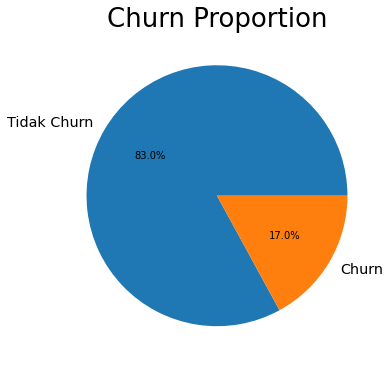

In [22]:
import matplotlib.pyplot as plt
 
A=['Tidak Churn', 'Churn']
T=a['Persentase(%)']
  
plt.pie(T, labels=A,autopct= '%1.1f%%')
plt.title('Churn Proportion', size = 26)
plt.show()

#### <b> Contoh handling outlier dengan IQR

In [ ]:
# Untuk kolom HourSpendOnApp
df_b = df.copy()
Q1_s = df_b['HourSpendOnApp'].quantile(0.25)
Q3_s = df_b['HourSpendOnApp'].quantile(0.75)
IQR_s = Q3_s-Q1_s
low_limit = Q1_s -(1.5*IQR_s)
high_limit = Q3_s + (1.5*IQR_s)
filtered_entries = ((df_b['HourSpendOnApp'] >= low_limit) & (df_b['HourSpendOnApp'] < high_limit))
df_x = df_b[filtered_entries]
print('Jumlah baris sebelum memfilter outlier :', len(df_b))
print('Jumlah baris setelah memfilter outlier :', len(df_x))

Jumlah baris sebelum memfilter outlier : 5630
Jumlah baris setelah memfilter outlier : 5624


In [ ]:
# Untuk kolom NumberOfDeviceRegistered
df_c = df.copy()
Q1_n = df_c['NumberOfDeviceRegistered'].quantile(0.25)
Q3_n = df_c['NumberOfDeviceRegistered'].quantile(0.75)
IQR_n = Q3_n-Q1_n
low_limit = Q1_n -(1.5*IQR_n)
high_limit = Q3_n + (1.5*IQR_n)
filtered_entries = ((df_c['NumberOfDeviceRegistered'] >= low_limit) & (df_c['NumberOfDeviceRegistered'] < high_limit))
df_y = df_c[filtered_entries]
print('Jumlah baris sebelum memfilter outlier :', len(df_c))
print('Jumlah baris setelah memfilter outlier :', len(df_y))

Jumlah baris sebelum memfilter outlier : 5630
Jumlah baris setelah memfilter outlier : 5233


In [ ]:
# jika disesuaikan kembali data yang dihapus dari kedua feature ini, maka 
df_oke = df_x.merge(df_y, on = 'CustomerID')
print('Jumlah baris setelah memfilter outlier dengan IQR dari kolom HourSpendOnApp dan NumberOfDeviceRegistered :', len(df_oke))
print('Maka outlier yang dihapus sekitar', ((len(df_c)-len(df_oke))/len(df_c)*100), '%')

Jumlah baris setelah memfilter outlier dengan IQR dari kolom HourSpendOnApp dan NumberOfDeviceRegistered : 5227
Maka outlier yang dihapus sekitar 7.158081705150978 %


data di atas masih handling ourlier dari 2 feature. bagaiman jika 10? pasti outlier yang dihilangkan akan lebih banyak sehingga mengganggu keseimbangan data, maupun pemodelan. dari trial di atas, metode IQR terlalu ekstrim dalam metode outlier handling pada case ini. 

-------------

#### Mengubah data yang tidak konsisten---> satu definisi, dua entry. 
contoh : phone dan mobile phone. 

In [23]:
df_z['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace = True)
df_z['PreferredPaymentMode'].replace('CC', 'Credit Card', inplace = True)
df_z['PreferredPaymentMode'].replace('COD', 'Cash on Delivery', inplace = True)
df_z['PreferedOrderCat'].replace('Mobile', 'Mobile Phone', inplace = True)

Cek kembali setelah di-replace

In [24]:
for col in df_z[cats]:
  print(f'value counts of column {col}')
  print(df_z[col].value_counts())
  print('---'*10, '\n')


value counts of column PreferredLoginDevice
Mobile Phone    3803
Computer        1547
Name: PreferredLoginDevice, dtype: int64
------------------------------ 

value counts of column PreferredPaymentMode
Debit Card          2195
Credit Card         1686
E wallet             579
Cash on Delivery     489
UPI                  401
Name: PreferredPaymentMode, dtype: int64
------------------------------ 

value counts of column Gender
Male      3214
Female    2136
Name: Gender, dtype: int64
------------------------------ 

value counts of column PreferedOrderCat
Mobile Phone          2053
Laptop & Accessory    2000
Fashion                752
Grocery                332
Others                 213
Name: PreferedOrderCat, dtype: int64
------------------------------ 

value counts of column MaritalStatus
Married     2825
Single      1722
Divorced     803
Name: MaritalStatus, dtype: int64
------------------------------ 



### BUSSINESS INSIGHT

#### 1. Kategori Produk yang paling banyak diminati

In [ ]:
df_prefered_order = df_z.groupby(['PreferedOrderCat']).agg({'CustomerID':'count'}).reset_index()
df_prefered_order['ratio']=df_prefered_order['CustomerID'].apply(lambda x:round( x*100.0/(df_prefered_order['CustomerID'].sum()),2))
df_prefered_order

,PreferedOrderCat,CustomerID,ratio
0,Fashion,752,14.06
1,Grocery,332,6.21
2,Laptop & Accessory,2000,37.38
3,Mobile Phone,2053,38.37
4,Others,213,3.98


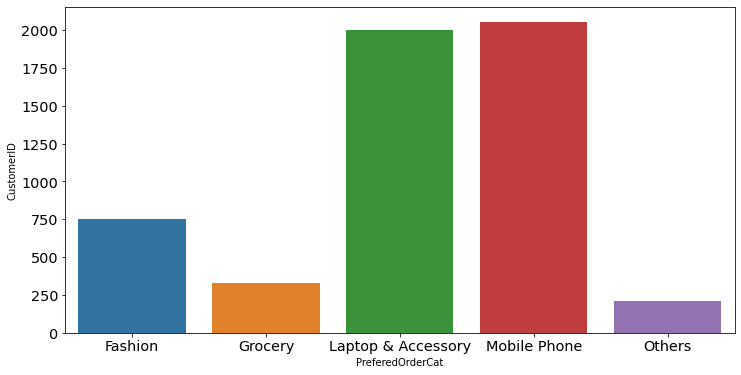

In [ ]:
sns.barplot(x='PreferedOrderCat', y='CustomerID', data=df_prefered_order);

Kategori mobile Phone dan laptop & accesory menjadi yang paling banyak diburu

In [ ]:
cats_update1 = ['MaritalStatus', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat']
df_z[cats].describe().transpose()

,count,unique,top,freq
PreferredLoginDevice,5350,2,Mobile Phone,3803
PreferredPaymentMode,5350,5,Debit Card,2195
Gender,5350,2,Male,3214
PreferedOrderCat,5350,5,Mobile Phone,2053
MaritalStatus,5350,3,Married,2825


#### 2. Churn by Tenure

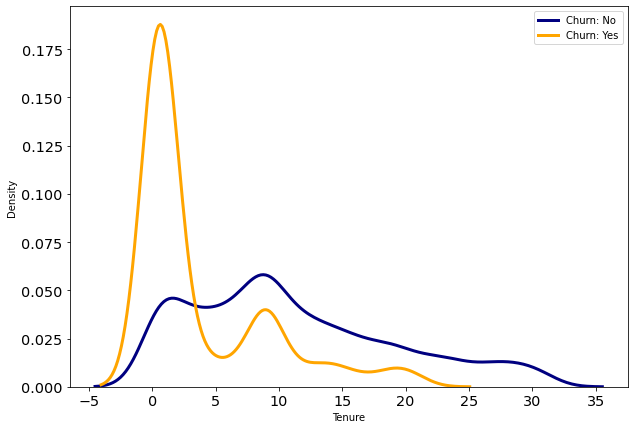

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.kdeplot(df_z[df_z['Churn']==0]['Tenure'].dropna(),color='navy',label='Churn: No', ax=ax)
sns.kdeplot(df_z[df_z['Churn']==1]['Tenure'].dropna(),color='orange',label='Churn: Yes', ax=ax)
plt.legend() ; 

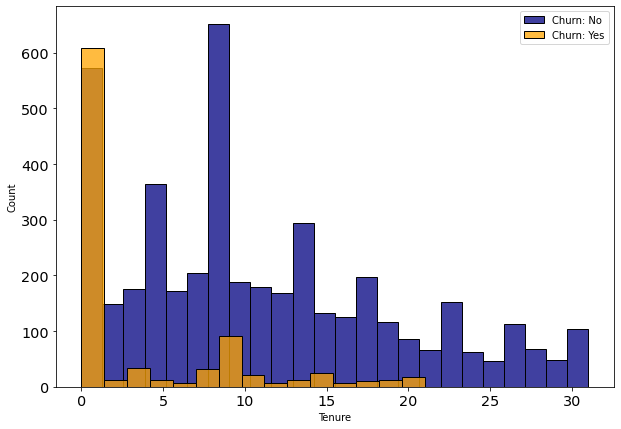

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sns.histplot(df_z[df_z['Churn']==0]['Tenure'].dropna(),color='navy',label='Churn: No', ax=ax)
sns.histplot(df_z[df_z['Churn']==1]['Tenure'].dropna(),color='orange',label='Churn: Yes', ax=ax)
plt.legend()

<b> INSIGHT :
Churn cenderung terjadi pada customer dengan loyalitas yang rendah atau belum terlalu lama menggunakan layanan. kemungkinan customer dengan loyalitas rendah ini adalah customer yang hanya menikmati flash sale atau promo singkat, dll. Pada masa 0-1 bulan adalah masa pelanggan baru menggunakan layanan e-commerce kita. Perlu dibuat fitur baru dalam layanan e-commerce seperti 'Gaining Poin or Coin' atau game mengumpulkan coin/poin tersebut yang nantinya dapat ditukar untuk meningkatkan rasa penasaran, experience dan ambisi dari customer sehingga dapat meningkatkan retensi dari pelanggan.

#### 3. Churn by Complain

In [ ]:
df_complain = df_z.groupby(['Complain','Churn']).agg({'CustomerID':'count'}).reset_index()
df_complained = df_z.groupby('Complain').agg({'CustomerID':'count'}).reset_index()

In [ ]:
data_complains = df_complain.merge(df_complained, on = 'Complain', how = 'left')
data_complains['Rasio (%)'] = data_complains['CustomerID_x']/data_complains['CustomerID_y']*100
data_complains

,Complain,Churn,CustomerID_x,CustomerID_y,Rasio (%)
0,0,0,3402,3818,89.104243
1,0,1,416,3818,10.895757
2,1,0,1036,1532,67.624021
3,1,1,496,1532,32.375979


Text(0.5, 1.0, 'Complain X Churn')

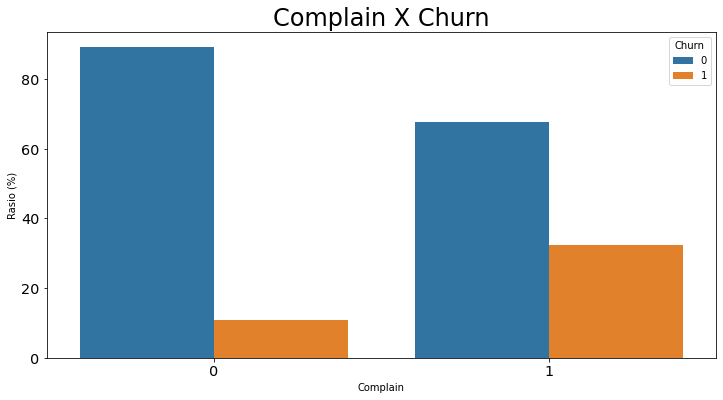

In [ ]:
conc1= "Persentase Customer  yang Churn dilihat dari Complain"
sns.barplot(x='Complain', y='Rasio (%)', hue='Churn', data=data_complains)
plt.title('Complain X Churn', size = 24)

Customer yang melakukan complain memiliki persentase 31.67% terhadap customer yang churn sehingga dibutuhkan perbaikan dalam penanganan complain (resolve complain). Jika komplain mereka tidak ditangani dengan baik, maka potensi customer yang complain dan belum churn akan churn pada waktunya karena faktor ketidakpuasan terhadap layanan kita.

#### 4. CHURN VS MARITAL STATUS

In [ ]:
df_status = df_z.groupby(['MaritalStatus','Churn']).agg({'CustomerID':'count'}).reset_index()
df_statuss = df_z.groupby('MaritalStatus').agg({'CustomerID':'count'}).reset_index()

In [ ]:
data_marital_status = df_status.merge(df_statuss, on = 'MaritalStatus', how = 'left')
data_marital_status['Rasio (%)'] = data_marital_status['CustomerID_x']/data_marital_status['CustomerID_y']*100
data_marital_status

,MaritalStatus,Churn,CustomerID_x,CustomerID_y,Rasio (%)
0,Divorced,0,686,803,85.429639
1,Divorced,1,117,803,14.570361
2,Married,0,2493,2825,88.247788
3,Married,1,332,2825,11.752212
4,Single,0,1259,1722,73.112660
5,Single,1,463,1722,26.887340


Text(0.5, 1.0, 'Marital Status X Churn')

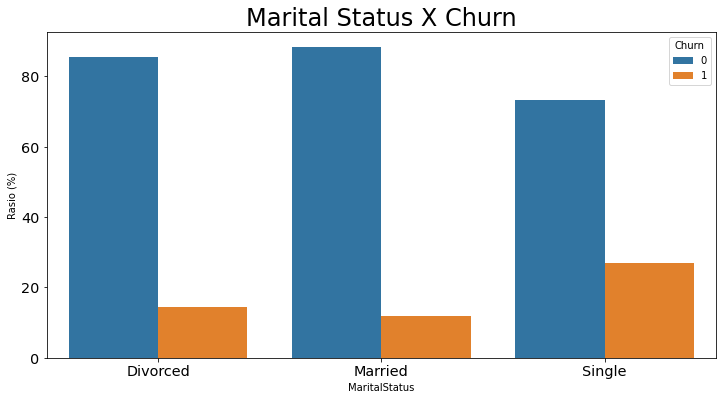

In [ ]:
conc1= "Persentase Customer  yang Churn dilihat dari Status Pernikahannya"
sns.barplot(x='MaritalStatus', y='Rasio (%)', hue='Churn', data=data_marital_status)
plt.title('Marital Status X Churn', size = 24)

Customer yang single lebih cenderung churn. Seseorang yang single memang memiliki kebiasaan untuk memilih. Memilih yang lebih banyak cashback nya (kemungkinan punya kompetitor lehih banyak cashbacknya), coupon nya dan keuntungan lainnya. Dibandingkan customer yang sudah menikah ataupun yang sudah pernah menikah, mereke cenderung lebih setiap atau bergantung kepada 1 platform e commerce yang selalu mereka gunakan, karena mereka sudah riset terlebih dahulu mengenai realibilitas, kemudahan dan keuntungan selama menggunakan layanan e commerce tersebut. selain itu, mereka juga sudah mulai terbiasa menjadi perilaku konsumtif dengan memanfaatkan layanan e commerce untuk melengkapi hampir seluruh kebutuhan mereka (sekunder).  

### D. Feature transformation

#### 1. NORMALIZATION/STANDARIZATION

In [25]:
df_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,52802.826168,1627.280475,50001.0,51394.25,52784.50,54208.75,55630.00
Churn,5350.0,0.170467,0.376078,0.0,0.00,0.00,0.00,1.00
Tenure,5350.0,9.804112,8.178609,0.0,2.00,9.00,15.00,31.00
CityTier,5350.0,1.652710,0.913816,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5350.0,15.541308,8.066006,5.0,9.00,14.00,20.00,36.00
HourSpendOnApp,5350.0,2.926508,0.701770,1.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5350.0,3.675140,1.026057,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5350.0,3.056449,1.378802,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5350.0,4.196449,2.544520,1.0,2.00,3.00,6.00,11.00
Complain,5350.0,0.286355,0.452100,0.0,0.00,0.00,1.00,1.00


-------------

* <b>  `Tenure` dan `WarehouseToHome`, distandarisasi MERUBAH bentuk sebaran data menjadi mendekati distribusi normal/mendekati, maka di lakukan standarisasi 
* <b> `CashbackAmount` , `NumberOfDeviceRegistered` dan `HourSpendOnApp` di normalisasi

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# CouponUsed dan OrderCount kita re-scale ke [0,1] (normalisasi)
df_z['CashbackAmount_normalisasi'] = MinMaxScaler().fit_transform(df_z['CashbackAmount'].values.reshape(len(df_z), 1))
df_z['NumberOfDeviceRegistered_normalisasi'] = MinMaxScaler().fit_transform(df_z['NumberOfDeviceRegistered'].values.reshape(len(df_z), 1))
df_z['DaySinceLastOrder_normalisasi'] = MinMaxScaler().fit_transform(df_z['DaySinceLastOrder'].values.reshape(len(df_z), 1))

# Tenure dan Warehouse perlu distandarisasi untuk mendapatkan data dengan distribusi normal
df_z['std_Tenure'] = StandardScaler().fit_transform(df_z['Tenure'].values.reshape(len(df_z), 1))
df_z['std_WarehouseToHome'] = StandardScaler().fit_transform(df_z['WarehouseToHome'].values.reshape(len(df_z), 1))

# OrderAmountHikeFromlastYear tidak perlu ditransformasi
# HourSpendOnApp tidak perlu di transformasi
# CouponUsed tidak perlu di transformasi
# OrderCount tidak perlu ditransformasi
# NumberofAddress tidak perlu ditransformasi
df_z

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CashbackAmount_normalisasi,NumberOfDeviceRegistered_normalisasi,DaySinceLastOrder_normalisasi,std_Tenure,std_WarehouseToHome
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,...,11.0,1.0,1.0,5.0,159.93,0.427241,0.4,0.333333,-0.709736,-1.183014
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.000000,4,...,15.0,0.0,1.0,0.0,120.90,0.291593,0.6,0.000000,-0.098328,-0.935037
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.000000,4,...,14.0,0.0,1.0,3.0,120.28,0.289438,0.6,0.200000,-0.098328,1.792714
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.000000,4,...,23.0,0.0,1.0,3.0,134.07,0.337365,0.6,0.200000,-1.198863,-0.067116
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,2.931535,3,...,11.0,1.0,1.0,3.0,129.60,0.321829,0.4,0.200000,-1.198863,-0.439082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.000000,2,...,18.0,1.0,2.0,4.0,150.71,0.395197,0.2,0.266667,0.023953,1.792714
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,...,16.0,1.0,2.0,3.0,224.91,0.653078,0.8,0.200000,0.390798,-0.315093
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,...,21.0,1.0,2.0,4.0,186.42,0.519306,0.2,0.266667,-1.076581,-0.563071
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.000000,5,...,15.0,2.0,2.0,9.0,178.90,0.493171,0.8,0.600000,1.613614,-0.811048


<b> Feature `Standarisasi` digunakan dalam feature transformation karena :
* Feature ini dapat merubah bentuk sebaran menjadi mendekati distribusi normal
* Range ketika standarisasi tidak terlalu loose dan nilainya adalah real. tidak seperti log transformation yang memungkinkan nilainya NaN dan Infinity (karena value dari feature). jadi, log transformation tidak disarankan pada case ini. 

In [27]:
# cek keberhasilan feature transformation
df_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,5.280283e+04,1627.280475,50001.000000,51394.250000,52784.500000,54208.750000,55630.000000
Churn,5350.0,1.704673e-01,0.376078,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5350.0,9.804112e+00,8.178609,0.000000,2.000000,9.000000,15.000000,31.000000
CityTier,5350.0,1.652710e+00,0.913816,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5350.0,1.554131e+01,8.066006,5.000000,9.000000,14.000000,20.000000,36.000000
HourSpendOnApp,5350.0,2.926508e+00,0.701770,1.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5350.0,3.675140e+00,1.026057,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5350.0,3.056449e+00,1.378802,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5350.0,4.196449e+00,2.544520,1.000000,2.000000,3.000000,6.000000,11.000000
Complain,5350.0,2.863551e-01,0.452100,0.000000,0.000000,0.000000,1.000000,1.000000


In [28]:
nums_after_transform = ['std_Tenure', 'std_WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered_normalisasi','SatisfactionScore', 'DaySinceLastOrder_normalisasi','NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'CashbackAmount_normalisasi']

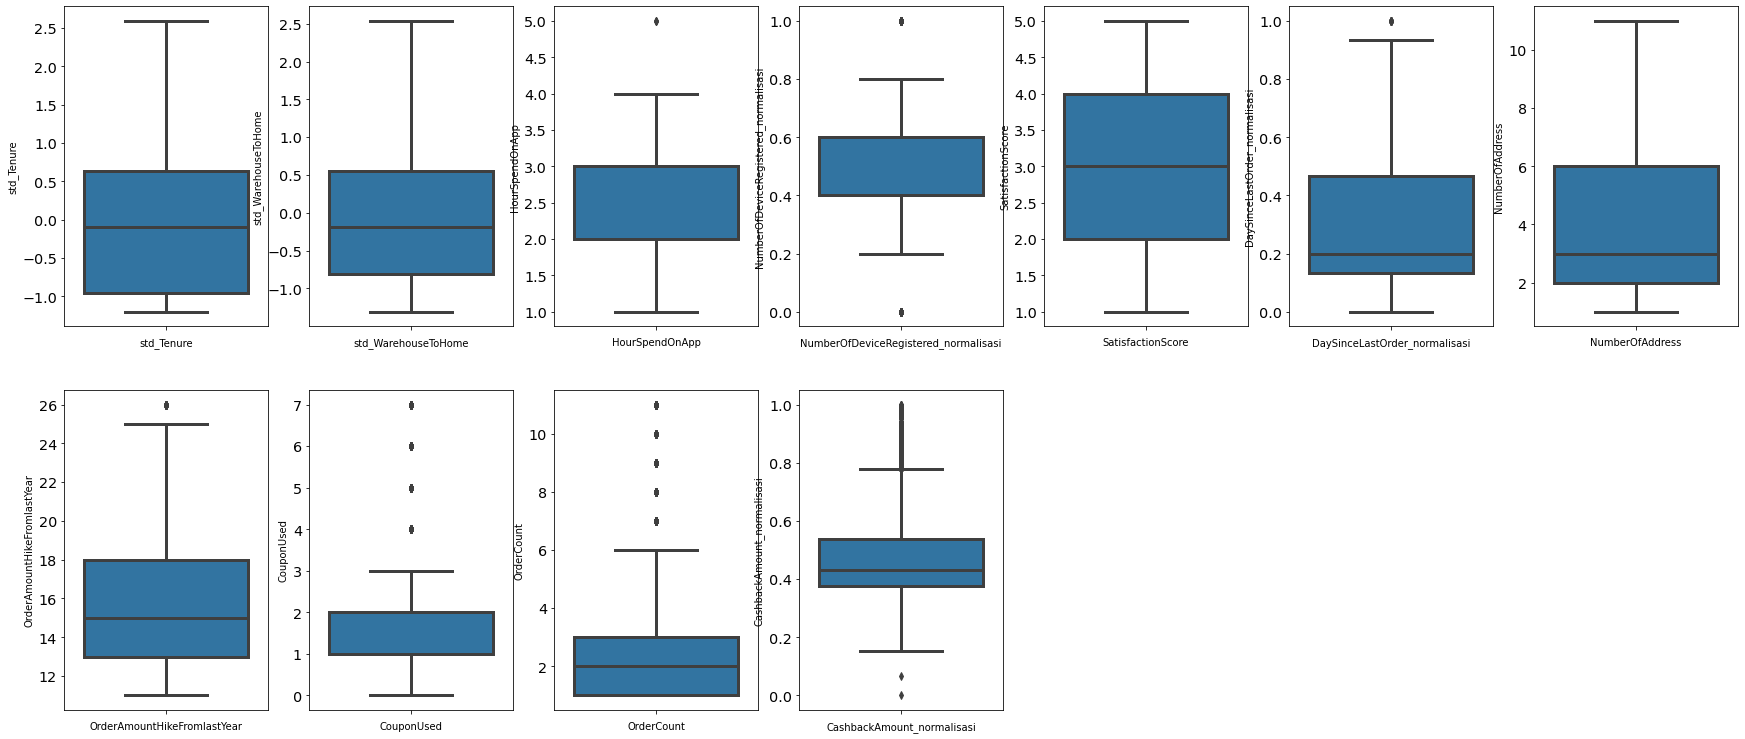

In [29]:
plt.figure(figsize=(30,20))
features = nums_after_transform
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df_z[features[i]], orient='v')
    plt.xlabel(features[i])

<b> Note :
* Jika dilihat dari distribusi data setelah standarisasi, range/point antar value tidak terlalu ekstrim, atau masih dapat ditolerir maka data ini sudah aman untuk dilakukan proses selanjutnya

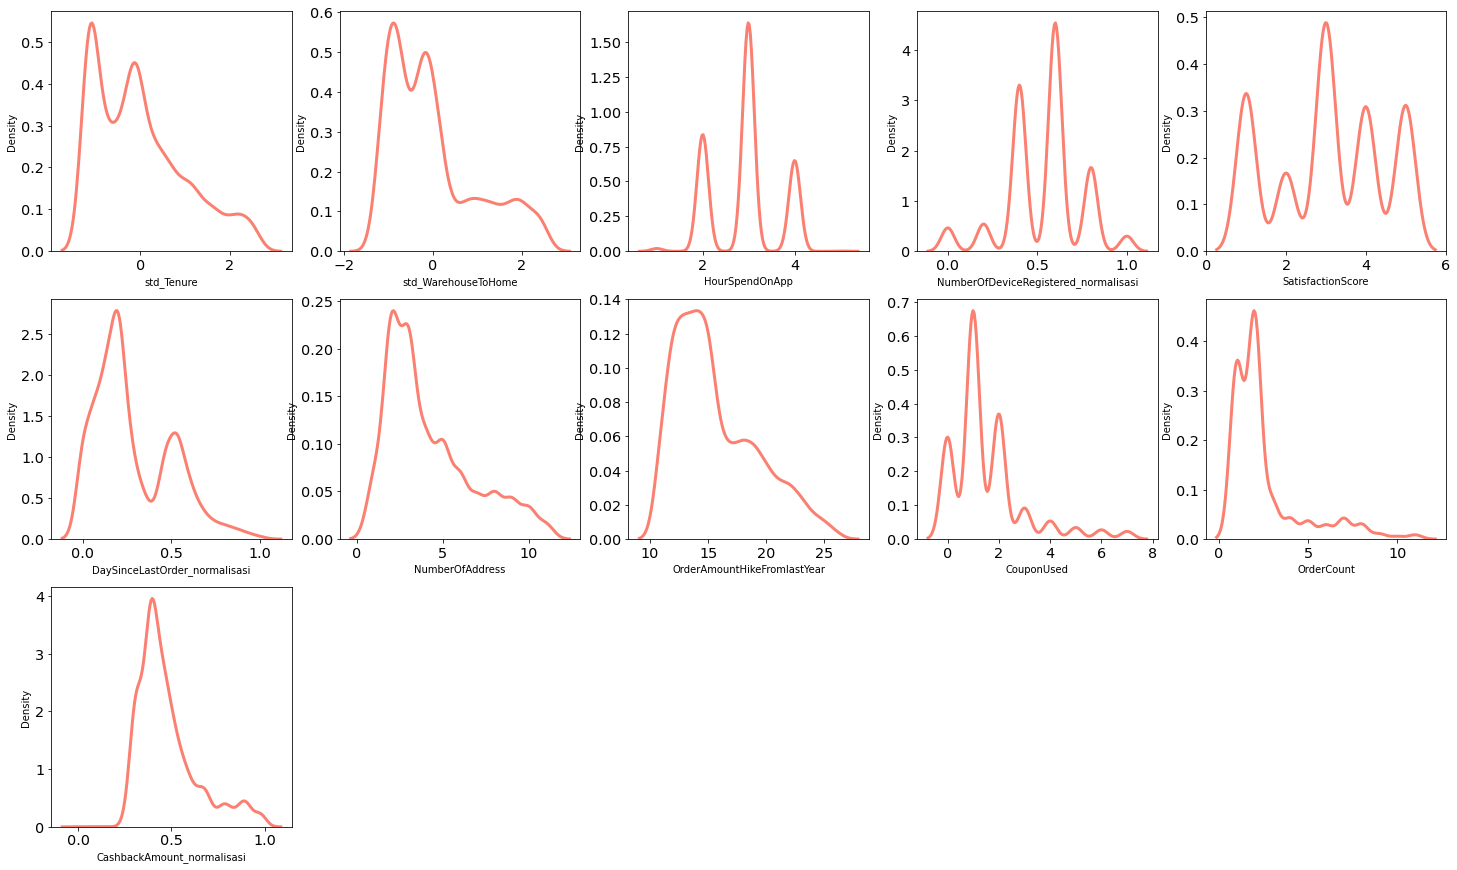

In [30]:
features = nums_after_transform
plt.figure(figsize=(25, 15))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df_z[features[i]], color='salmon')
    plt.xlabel(features[i])

### E. FEATURE ENCODING

In [31]:
df_z.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CashbackAmount_normalisasi,NumberOfDeviceRegistered_normalisasi,DaySinceLastOrder_normalisasi,std_Tenure,std_WarehouseToHome
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,...,11.0,1.0,1.0,5.0,159.93,0.427241,0.4,0.333333,-0.709736,-1.183014
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.000000,4,...,15.0,0.0,1.0,0.0,120.90,0.291593,0.6,0.000000,-0.098328,-0.935037
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.000000,4,...,14.0,0.0,1.0,3.0,120.28,0.289438,0.6,0.200000,-0.098328,1.792714
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.000000,4,...,23.0,0.0,1.0,3.0,134.07,0.337365,0.6,0.200000,-1.198863,-0.067116
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,2.931535,3,...,11.0,1.0,1.0,3.0,129.60,0.321829,0.4,0.200000,-1.198863,-0.439082


In [32]:
df_z.shape

(5350, 25)

In [33]:
cats_update1 = ['MaritalStatus', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat']
df_z[cats].describe().transpose()

,count,unique,top,freq
PreferredLoginDevice,5350,2,Mobile Phone,3803
PreferredPaymentMode,5350,5,Debit Card,2195
Gender,5350,2,Male,3214
PreferedOrderCat,5350,5,Mobile Phone,2053
MaritalStatus,5350,3,Married,2825


----------------

### E. FEATURE ENCODING

In [34]:
cats_updated = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']

<b>Strategi encoding
* `Gender` \: label encoding
* `MaritalStatus`, `PreferredLoginDevice`, `PreferedOrderCat` \: One Hot Encoding 

In [35]:
# Mapping Gender
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}
df_z['Gender'] = df_z['Gender'].map(mapping_gender)

In [36]:
for cat in ['MaritalStatus', 'PreferredLoginDevice', 'PreferedOrderCat']:
    onehots = pd.get_dummies(df_z[cat], prefix=cat)
    df_z = df_z.join(onehots)
#PreferedPaymentMethod tidak perlu di feature encoding. pengaruh feature ini terhadap label sangat kecil

In [37]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CustomerID                            5350 non-null   int64  
 1   Churn                                 5350 non-null   int64  
 2   Tenure                                5350 non-null   float64
 3   PreferredLoginDevice                  5350 non-null   object 
 4   CityTier                              5350 non-null   int64  
 5   WarehouseToHome                       5350 non-null   float64
 6   PreferredPaymentMode                  5350 non-null   object 
 7   Gender                                5350 non-null   int64  
 8   HourSpendOnApp                        5350 non-null   float64
 9   NumberOfDeviceRegistered              5350 non-null   int64  
 10  PreferedOrderCat                      5350 non-null   object 
 11  SatisfactionScore

### F. HANDLE CLASS IMBALANCE 

INGAT: Process data preprocessing kita (untuk pemodelan `Churn prediction` sebenarnya sudah selesai per df.info() di atas).

In [38]:
# pembuatan binary label target yang imbalance (sebagai contoh)
df_z['churn_class'] = df_z['Churn'] > 0.8
df_z['churn_class'].value_counts()

False    4438
True      912
Name: churn_class, dtype: int64

In [39]:
# pemisahan features vs target
X = df_z[[col for col in df_z.columns if (str(df_z[col].dtype) != 'object') and col not in ['Churn', 'churn_class']]]
y = df_z['churn_class'].values
print(X.shape)
print(y.shape)

(5350, 30)
(5350,)


In [40]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [41]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    4438
True      912
dtype: int64


UNDERSAMPLING
False    1824
True      912
dtype: int64


OVERSAMPLING
False    4438
True     2219
dtype: int64


SMOTE
False    4438
True     2219
dtype: int64


<B> PADA STAGE 3 NANTI,  DATA TRAINING YANG DI SMOTE, 
DATA TEST JANGAN DILAKUKAN DATA IMBALANCING

## 2. Feature Engineering

### A. Feature selection (membuang feature yang kurang relevan atau redundan)

#### Drop kolom-kolom yang outdated

In [42]:
df_z1 = df_z.copy()
df_z1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus_Married,MaritalStatus_Single,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,churn_class
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,0,3.000000,3,...,0,1,0,1,0,0,1,0,0,True
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,1,3.000000,4,...,0,1,0,1,0,0,0,1,0,True
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,1,2.000000,4,...,0,1,0,1,0,0,0,1,0,True
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,1,2.000000,4,...,0,1,0,1,0,0,1,0,0,True
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,1,2.931535,3,...,0,1,0,1,0,0,0,1,0,True


In [43]:
# drop kolom2 yang asli (karena sudah di-encoding)
df_z1= df_z1.drop(columns=['PreferredLoginDevice', 'MaritalStatus','PreferredPaymentMode','PreferedOrderCat'])

Text(0.5, 1.0, 'Korelasi')

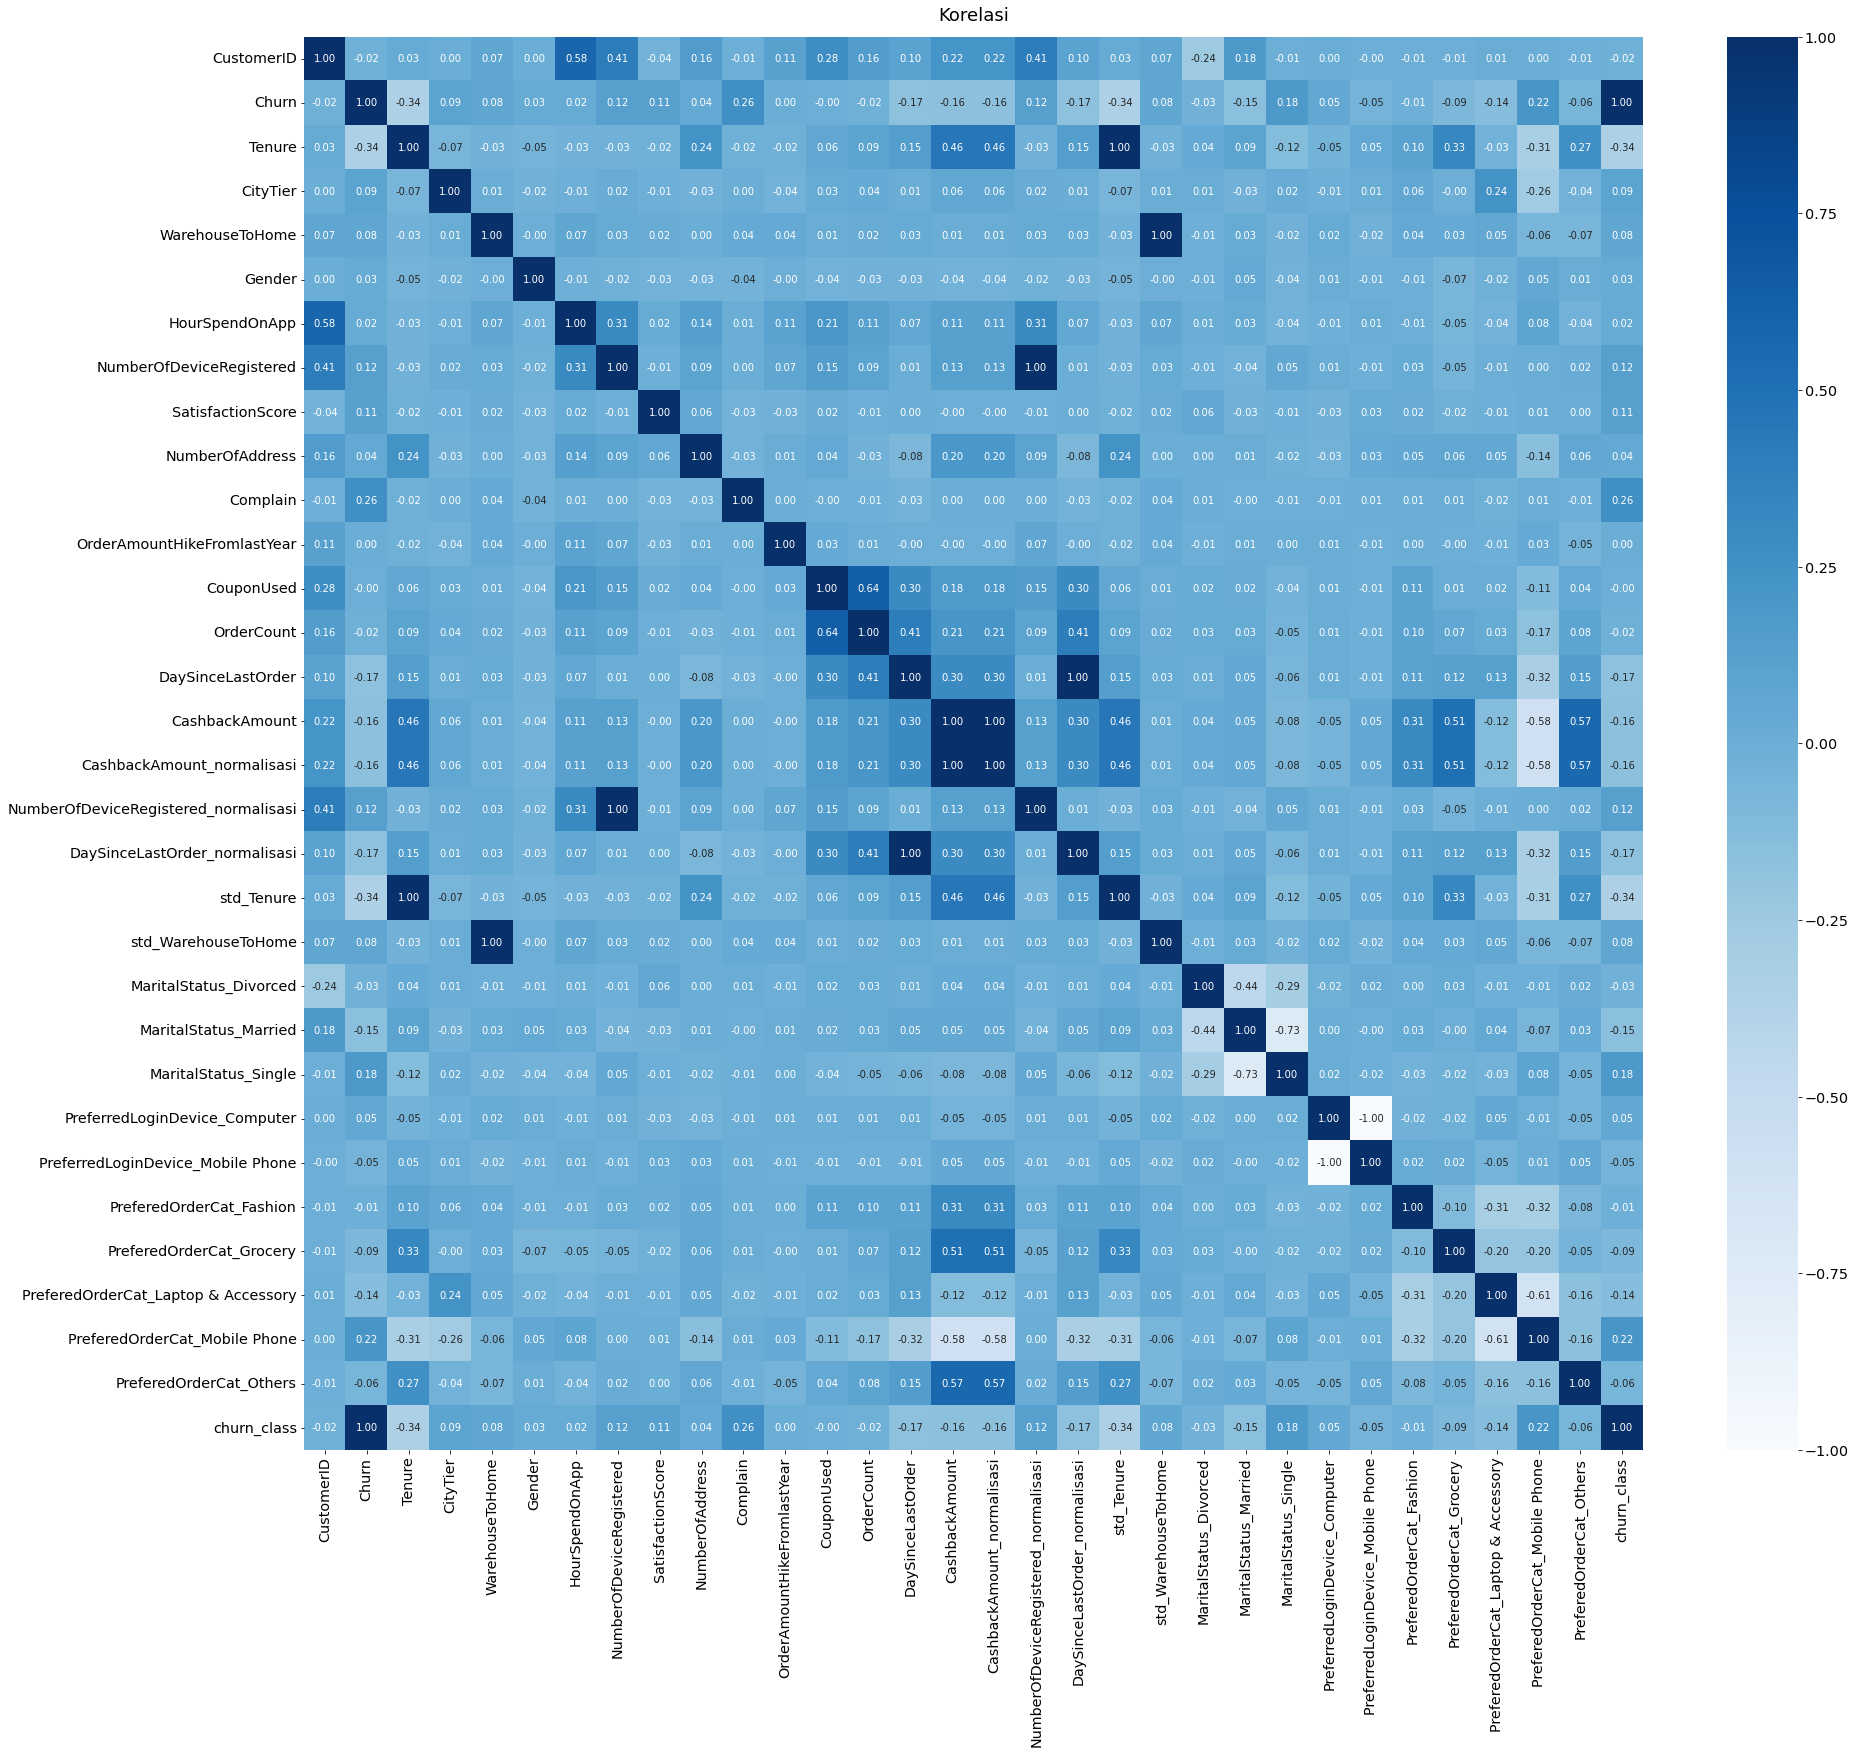

In [44]:
#melihat kembali korelasi fitur terhadap label (churn)
plt.figure(figsize = (30, 26))
heatmaps=sns.heatmap(df_z1.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

In [45]:
# drop kolom2 berikut (ada yang sudah dilakukan Feature Transformation, ada yang tidak perlu)
df_z2= df_z1.drop(columns=['CustomerID', 'Tenure','NumberOfDeviceRegistered', 'WarehouseToHome',
                        'DaySinceLastOrder', 'CashbackAmount', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'Gender' ])
# Tenure telah ditransformasi
# OrderAmountHikeFromlastYear memiliki korelasi yang sangat kecil terhadap label
# CouponUsed memiliki korelasi yang sangat kecil terhadap label
# OrderCount memiliki korelasi yang sangat kecil terhadap label
# CashbackAmount telah di normalisasi
# DaySinceLastOrder telah di normalisasi
# NumberOfDeviceRegistered telah di transformasi


Text(0.5, 1.0, 'Korelasi')

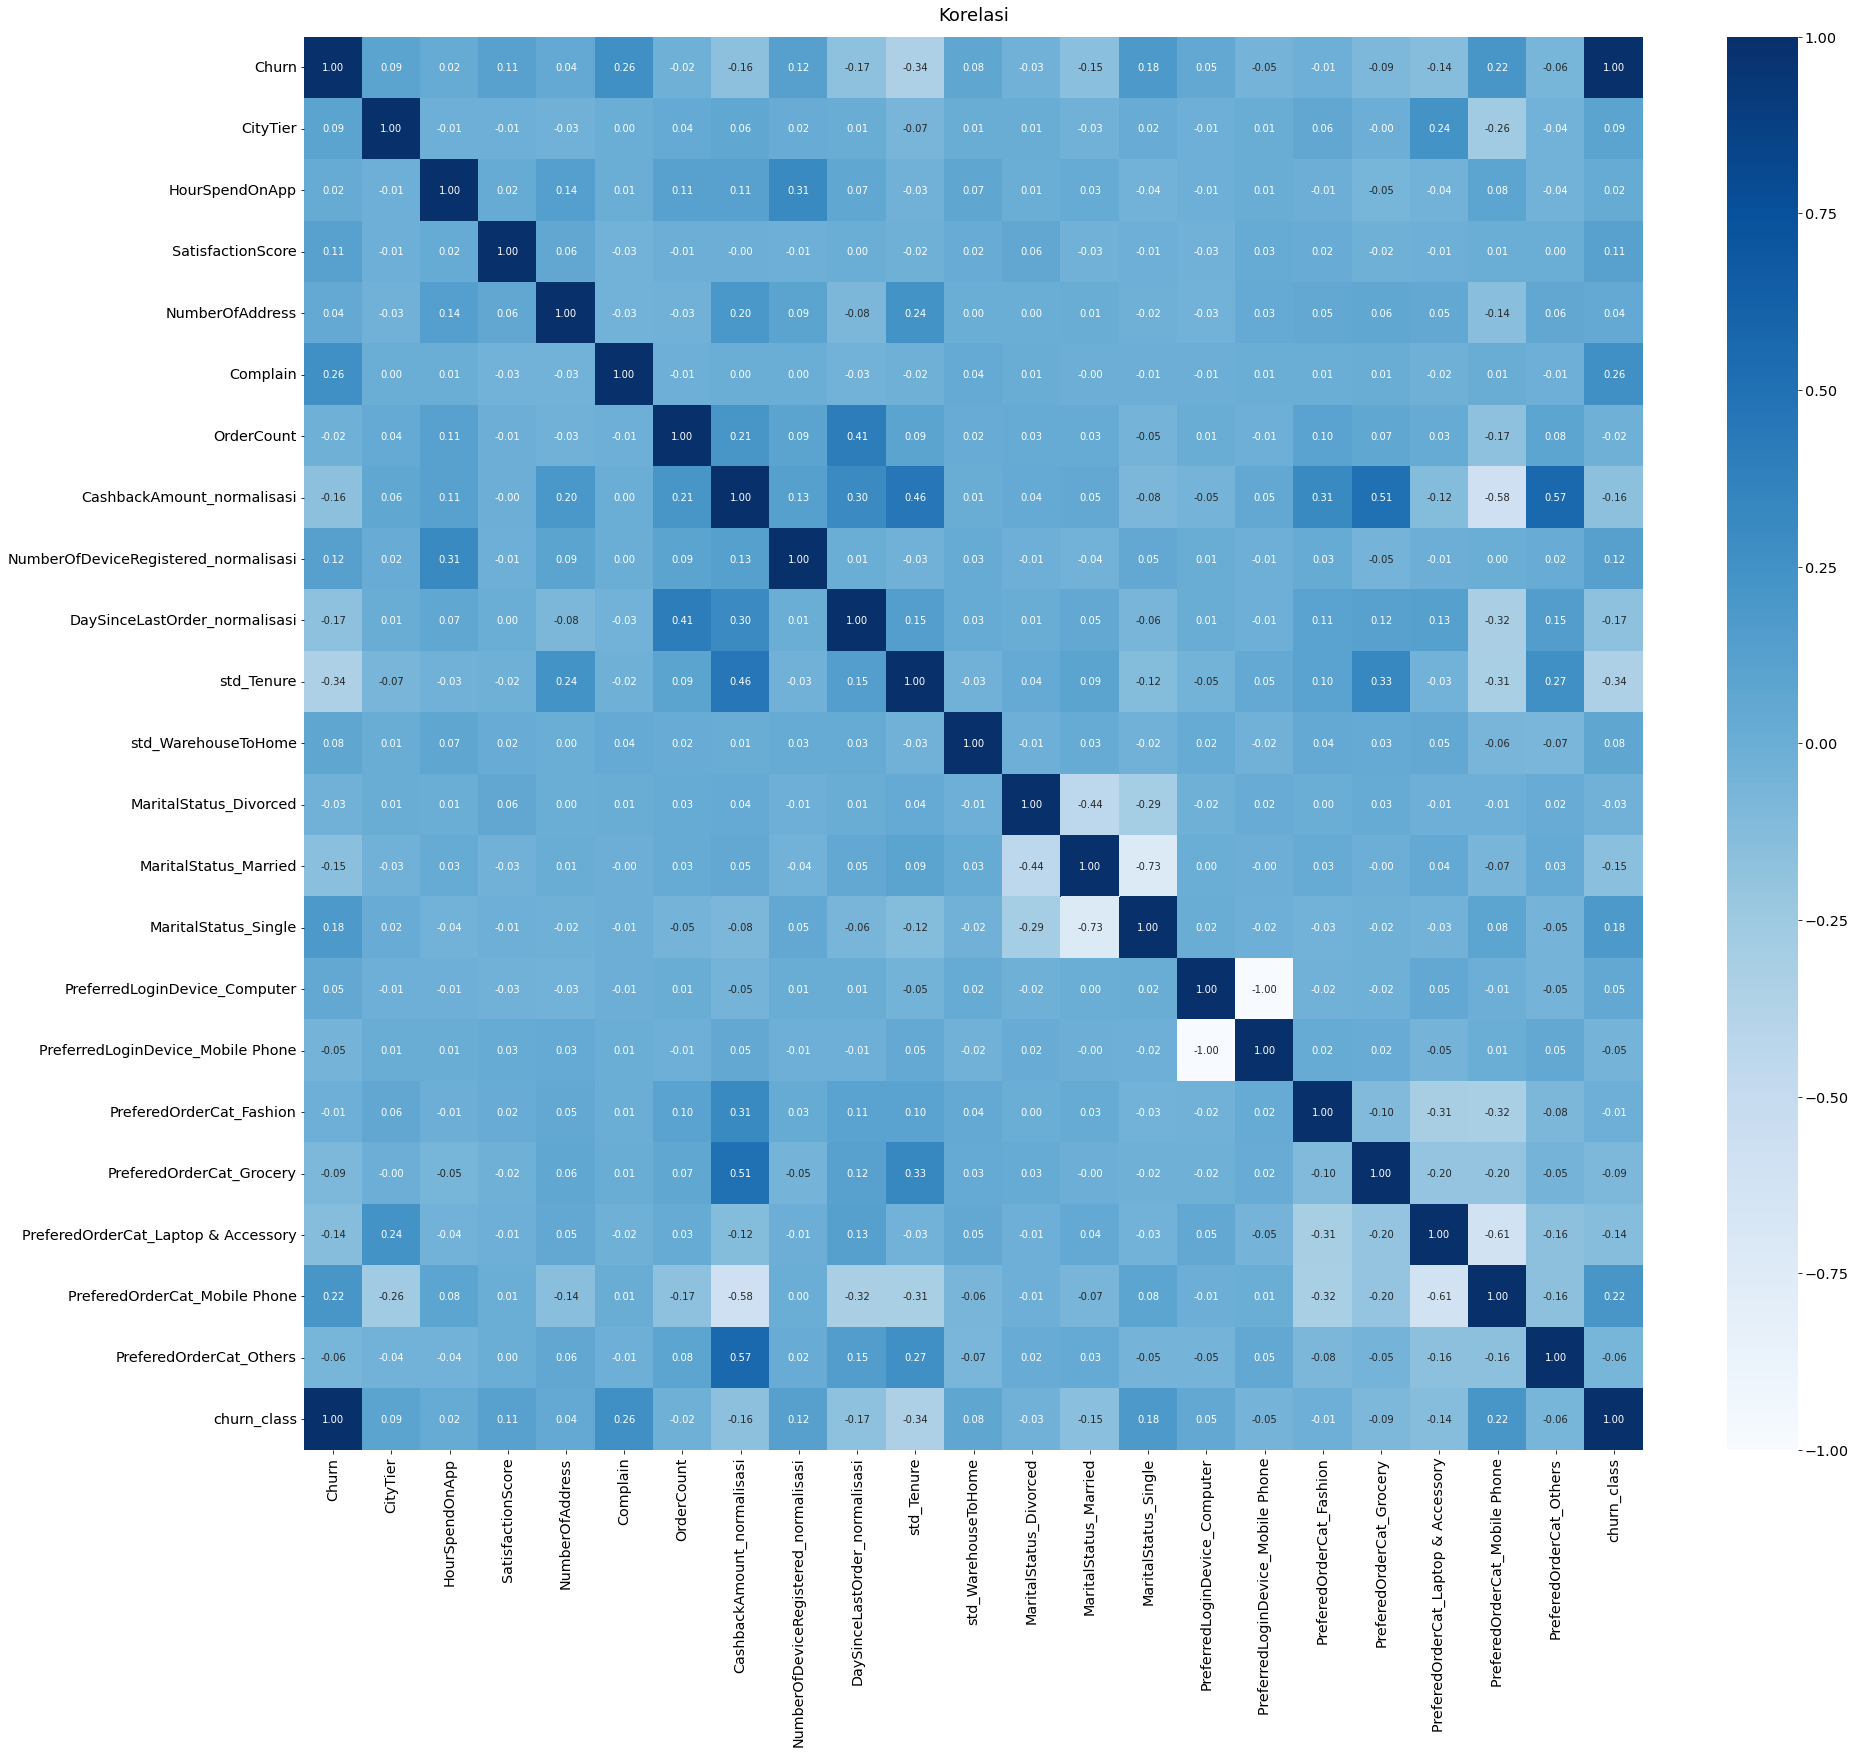

In [46]:
#melihat kembali korelasi fitur terhadap label (churn)
plt.figure(figsize = (30, 26))
heatmaps=sns.heatmap(df_z2.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

<b> setelah menghapus beberapa fitur yang tidak terlalu potensial :

In [47]:
df_z2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Churn                                 5350 non-null   int64  
 1   CityTier                              5350 non-null   int64  
 2   HourSpendOnApp                        5350 non-null   float64
 3   SatisfactionScore                     5350 non-null   int64  
 4   NumberOfAddress                       5350 non-null   int64  
 5   Complain                              5350 non-null   int64  
 6   OrderCount                            5350 non-null   float64
 7   CashbackAmount_normalisasi            5350 non-null   float64
 8   NumberOfDeviceRegistered_normalisasi  5350 non-null   float64
 9   DaySinceLastOrder_normalisasi         5350 non-null   float64
 10  std_Tenure                            5350 non-null   float64
 11  std_WarehouseToHo

### B. Feature extraction (membuat feature baru dari feature yang sudah ada)

In [48]:
df_z2.head()

,Churn,CityTier,HourSpendOnApp,SatisfactionScore,NumberOfAddress,Complain,OrderCount,CashbackAmount_normalisasi,NumberOfDeviceRegistered_normalisasi,DaySinceLastOrder_normalisasi,...,MaritalStatus_Married,MaritalStatus_Single,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,churn_class
0,1,3,3.000000,2,9,1,1.0,0.427241,0.4,0.333333,...,0,1,0,1,0,0,1,0,0,True
1,1,1,3.000000,3,7,1,1.0,0.291593,0.6,0.000000,...,0,1,0,1,0,0,0,1,0,True
2,1,1,2.000000,3,6,1,1.0,0.289438,0.6,0.200000,...,0,1,0,1,0,0,0,1,0,True
3,1,3,2.000000,5,8,0,1.0,0.337365,0.6,0.200000,...,0,1,0,1,0,0,1,0,0,True
4,1,1,2.931535,5,3,0,1.0,0.321829,0.4,0.200000,...,0,1,0,1,0,0,0,1,0,True


In [49]:
df_z2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5350.0,1.704673e-01,0.376078,0.000000,0.000000,0.000000,0.000000,1.000000
CityTier,5350.0,1.652710e+00,0.913816,1.000000,1.000000,1.000000,3.000000,3.000000
HourSpendOnApp,5350.0,2.926508e+00,0.701770,1.000000,2.000000,3.000000,3.000000,5.000000
SatisfactionScore,5350.0,3.056449e+00,1.378802,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5350.0,4.196449e+00,2.544520,1.000000,2.000000,3.000000,6.000000,11.000000
Complain,5350.0,2.863551e-01,0.452100,0.000000,0.000000,0.000000,1.000000,1.000000
OrderCount,5350.0,2.558692e+00,2.084810,1.000000,1.000000,2.000000,3.000000,11.000000
CashbackAmount_normalisasi,5350.0,4.781560e-01,0.161715,0.000000,0.376534,0.432419,0.537031,1.000000
NumberOfDeviceRegistered_normalisasi,5350.0,5.350280e-01,0.205211,0.000000,0.400000,0.600000,0.600000,1.000000
DaySinceLastOrder_normalisasi,5350.0,2.821308e-01,0.218024,0.000000,0.133333,0.200000,0.466667,1.000000


Dibuat segmentasi customer berdasarkan order count. Jika jumlah ordernya 2-3, dikategorikan sebagai Bronze, Jika order nya sebanyak 4-8 dikategorikan sebagai silver dan lebih dari 8 dikategorikan sebagai Gold. 

In [50]:
klasifikasi = []

for i, kolom in df_z2.iterrows():
    if kolom ['OrderCount'] < 4: 
        result = 'Bronze'
    elif kolom ['OrderCount'] < 9 and kolom ['OrderCount'] >=8 : 
        result = 'Silver'
    else :
        result = 'Gold'
    klasifikasi.append(result)
df_z2['CustomerCategory']=klasifikasi
df_z2

,Churn,CityTier,HourSpendOnApp,SatisfactionScore,NumberOfAddress,Complain,OrderCount,CashbackAmount_normalisasi,NumberOfDeviceRegistered_normalisasi,DaySinceLastOrder_normalisasi,...,MaritalStatus_Single,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,churn_class,CustomerCategory
0,1,3,3.000000,2,9,1,1.0,0.427241,0.4,0.333333,...,1,0,1,0,0,1,0,0,True,Bronze
1,1,1,3.000000,3,7,1,1.0,0.291593,0.6,0.000000,...,1,0,1,0,0,0,1,0,True,Bronze
2,1,1,2.000000,3,6,1,1.0,0.289438,0.6,0.200000,...,1,0,1,0,0,0,1,0,True,Bronze
3,1,3,2.000000,5,8,0,1.0,0.337365,0.6,0.200000,...,1,0,1,0,0,1,0,0,True,Bronze
4,1,1,2.931535,5,3,0,1.0,0.321829,0.4,0.200000,...,1,0,1,0,0,0,1,0,True,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,1,3.000000,1,6,0,2.0,0.395197,0.2,0.266667,...,0,1,0,0,0,1,0,0,False,Bronze
5626,0,1,3.000000,5,6,0,2.0,0.653078,0.8,0.200000,...,0,0,1,1,0,0,0,0,False,Bronze
5627,0,1,3.000000,4,3,1,2.0,0.519306,0.2,0.266667,...,0,0,1,0,0,1,0,0,False,Bronze
5628,0,3,4.000000,4,4,0,2.0,0.493171,0.8,0.600000,...,0,1,0,0,0,1,0,0,False,Bronze


In [51]:
# Mapping CustomerCategory
mapping_CustomerCategory = {
    'Bronze' : 0,
    'Silver' : 1,
    'Gold' : 2
}
df_z2['CustomerCategory'] = df_z2['CustomerCategory'].map(mapping_CustomerCategory)

In [52]:
df_z2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Churn                                 5350 non-null   int64  
 1   CityTier                              5350 non-null   int64  
 2   HourSpendOnApp                        5350 non-null   float64
 3   SatisfactionScore                     5350 non-null   int64  
 4   NumberOfAddress                       5350 non-null   int64  
 5   Complain                              5350 non-null   int64  
 6   OrderCount                            5350 non-null   float64
 7   CashbackAmount_normalisasi            5350 non-null   float64
 8   NumberOfDeviceRegistered_normalisasi  5350 non-null   float64
 9   DaySinceLastOrder_normalisasi         5350 non-null   float64
 10  std_Tenure                            5350 non-null   float64
 11  std_WarehouseToHo

In [53]:
# drop kolom2 ordercount
df_z2= df_z2.drop(columns=['OrderCount'])

In [54]:
df_z2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Churn                                 5350 non-null   int64  
 1   CityTier                              5350 non-null   int64  
 2   HourSpendOnApp                        5350 non-null   float64
 3   SatisfactionScore                     5350 non-null   int64  
 4   NumberOfAddress                       5350 non-null   int64  
 5   Complain                              5350 non-null   int64  
 6   CashbackAmount_normalisasi            5350 non-null   float64
 7   NumberOfDeviceRegistered_normalisasi  5350 non-null   float64
 8   DaySinceLastOrder_normalisasi         5350 non-null   float64
 9   std_Tenure                            5350 non-null   float64
 10  std_WarehouseToHome                   5350 non-null   float64
 11  MaritalStatus_Div

Text(0.5, 1.0, 'Korelasi')

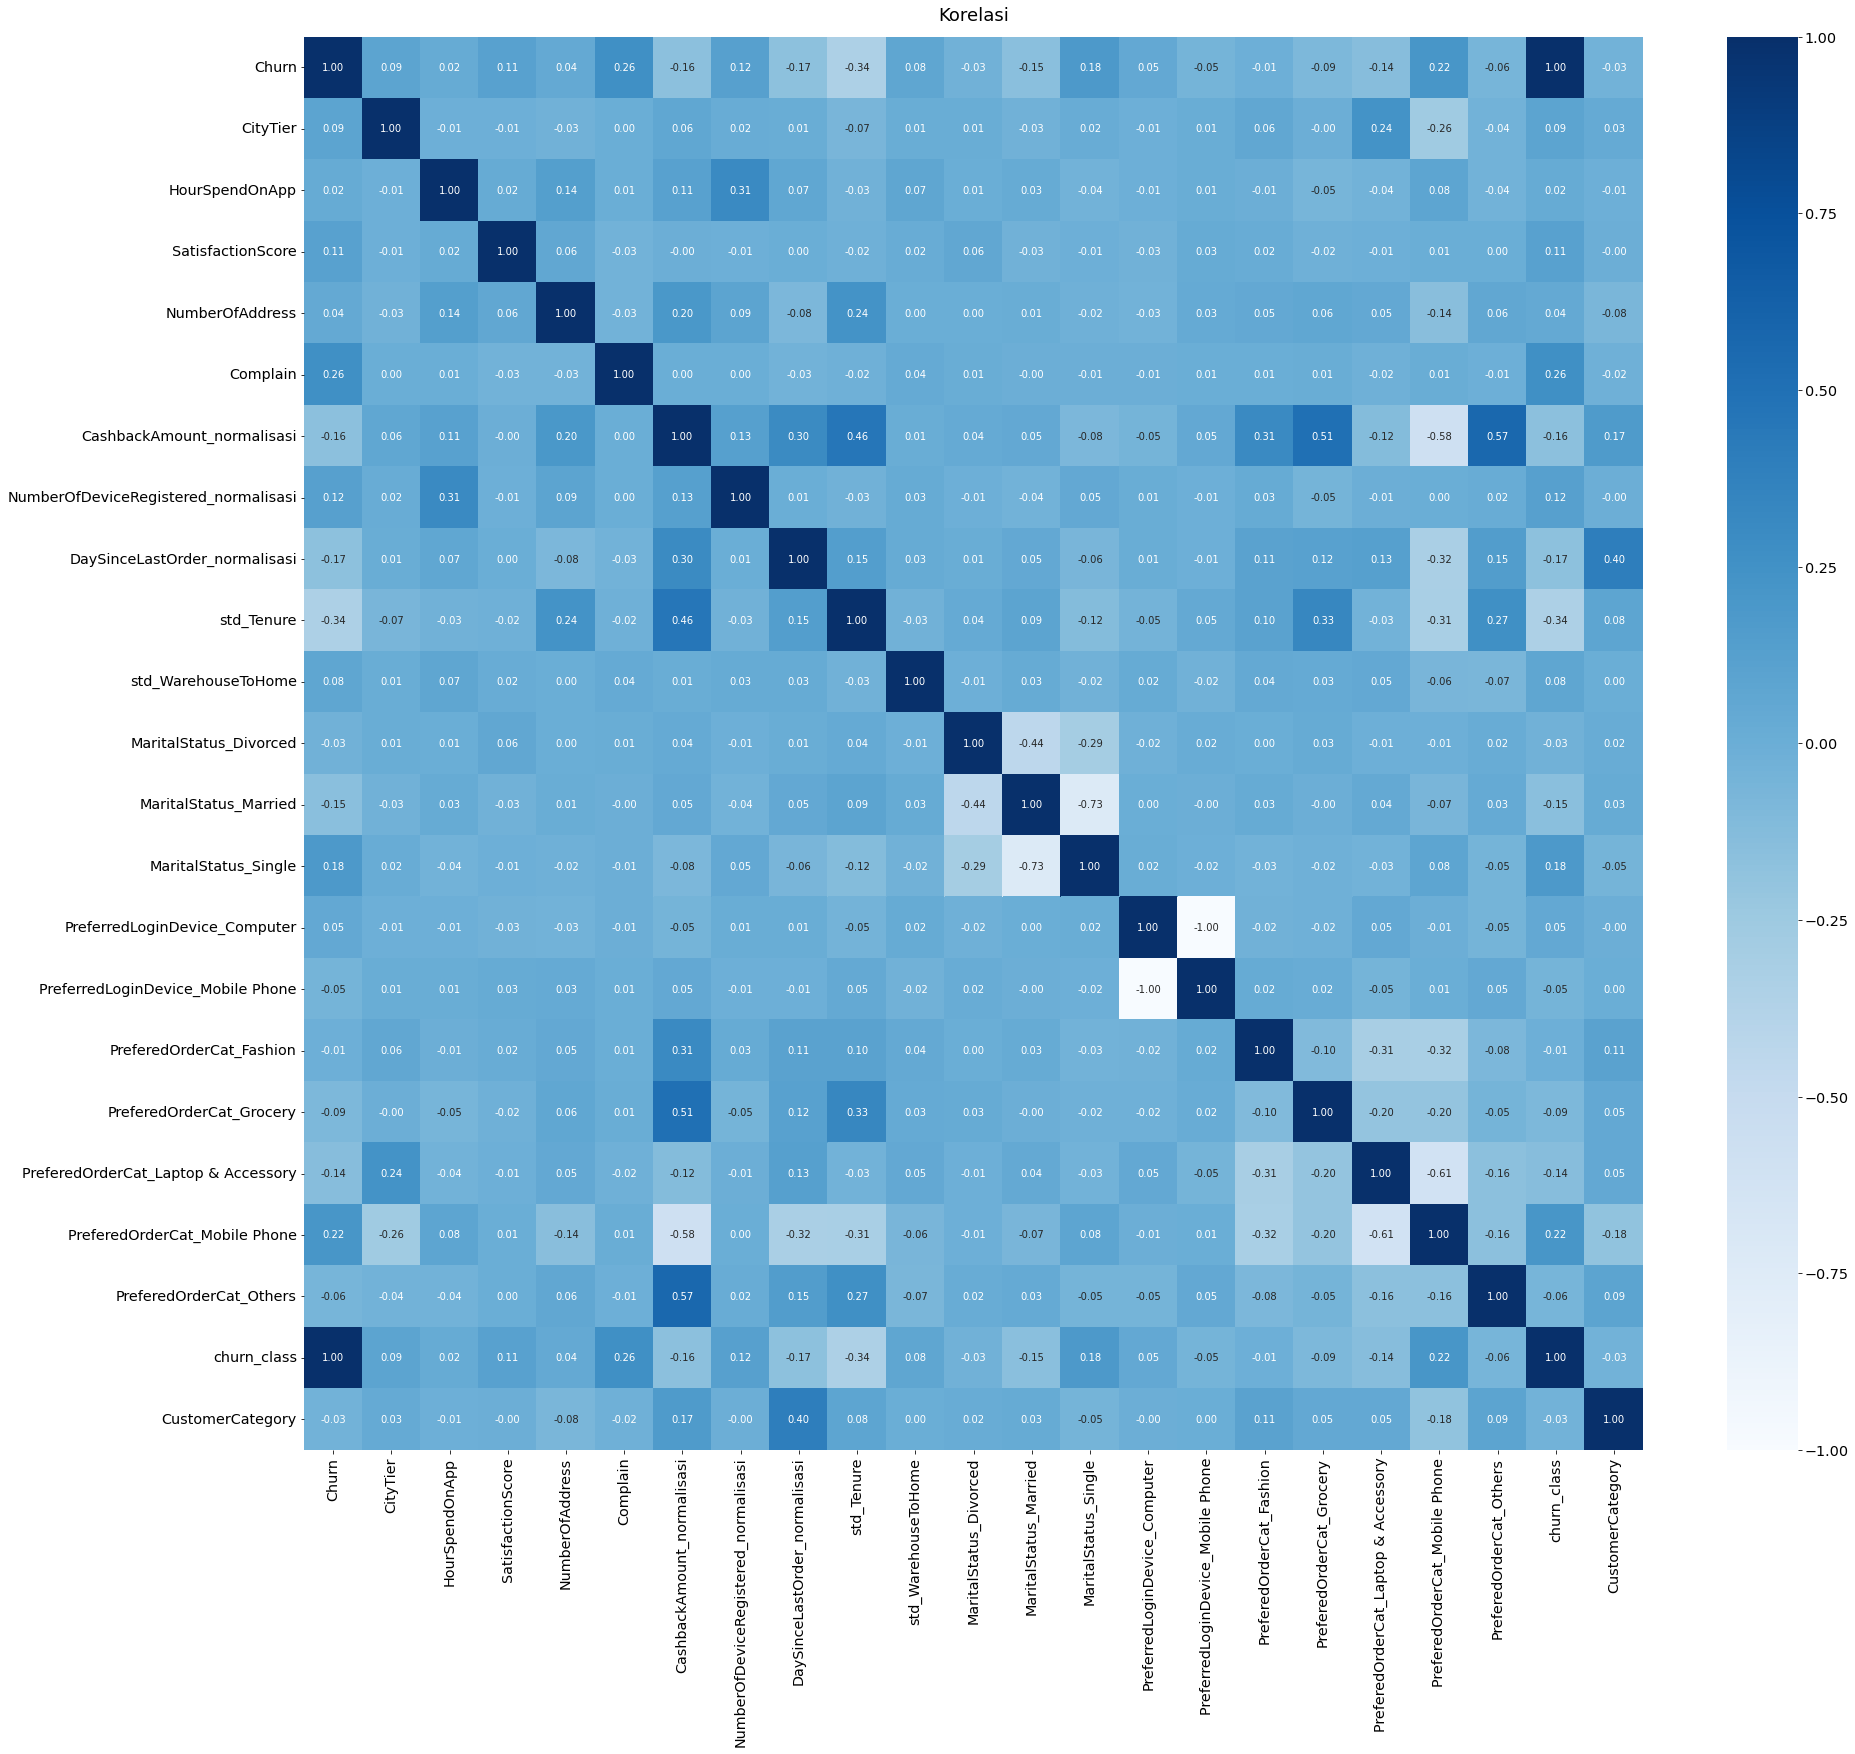

In [55]:
#melihat kembali korelasi fitur terhadap label (churn)
plt.figure(figsize = (30, 26))
heatmaps=sns.heatmap(df_z2.corr(),cmap='Blues', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

### C. Tuliskan minimal 4 feature tambahan

* <b> Membuat suka-tidak suka dari satisfaction score,
sangat tidak puas - tidak puas - cukup puas - puas -sangat puas
* <b> Penghasilan → dapat digunakan untuk melihat apakah besar pernghasilan yang dimiliki seorang customer berpengaruh terhadap kemampuan beli customer tersebut atau tidak.
* <b> Umur → Data umur customer dapat digunakan dalam pengelompokan customer dan melihat kecenderungan ketertarikan produk dalam setiap kelompok, yang kemudian dapat digunakan untuk melakukan promosi terhadap produk-produk yang mungkin disukai oleh kelompok usia tertentu.
* <b> Total Charges → Dengan mengetahui jumlah pengeluaran seorang customer di e-commerce, dapat diprediksi seberapa loyal customer tersebut.
* <b> Total transaction/spend → Informasi ini bermanfaat dalam memprediksi seberapa sering seorang customer melakukan transaksi.
* <b> Profession → Data mengenai profesi yang dimiliki seorang customer dapat digunakan untuk membuat pengklasifikasian, profesi apa lebih banyak melakukan pembelian kategori produk apa.
* <b> Ongkos kirim → Besar biaya pengiriman yang dibebankan kepada customer, juga dapat digunakan untuk memprediksi seberapa loyal seorang customer.
* <b> Transaction Time/waktu transaksi → Informasi mengenai waktu transaksi ini dapat digunakan dalam memperkirakan waktu yang tepat ketika hendak melakukan promosi, sehingga promosi yang dilakukan dapat menjangkau lebih banyak customer. <br><br>

Dengan tambahan feature-feature di atas, kami berpendapat bahwa model machine learning yang dibuat akan semakin efektif dan tepat sasaran.

# Stage 3 - MODELLING

In [56]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## CLASSIFICATION

In [58]:
df_model = df_z2.copy()

In [59]:
# pemisahan features vs target
X = df_model[[col for col in df_model.columns if (str(df_model[col].dtype) != 'object') and col not in ['Churn', 'churn_class']]]
y = df_model['churn_class'].values
print(X.shape)
print(y.shape)

(5350, 21)
(5350,)


In [60]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Churn                                 5350 non-null   int64  
 1   CityTier                              5350 non-null   int64  
 2   HourSpendOnApp                        5350 non-null   float64
 3   SatisfactionScore                     5350 non-null   int64  
 4   NumberOfAddress                       5350 non-null   int64  
 5   Complain                              5350 non-null   int64  
 6   CashbackAmount_normalisasi            5350 non-null   float64
 7   NumberOfDeviceRegistered_normalisasi  5350 non-null   float64
 8   DaySinceLastOrder_normalisasi         5350 non-null   float64
 9   std_Tenure                            5350 non-null   float64
 10  std_WarehouseToHome                   5350 non-null   float64
 11  MaritalStatus_Div

In [61]:
#Splitting the data into Train & Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [62]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

In [63]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    4438
True      912
dtype: int64


UNDERSAMPLING
False    646
True     646
dtype: int64


OVERSAMPLING
False    3099
True     3099
dtype: int64


SMOTE
False    3099
True     3099
dtype: int64


## A. Logistic Regression


In [64]:
#inisialisasi object logistic regression
model = LogisticRegression(random_state=42)

#fitting model logistic regression
model.fit(X_over_SMOTE, y_over_SMOTE)

LogisticRegression(random_state=42)

<b>Prediction Result (in data test)</b>

In [65]:
y_pred = model.predict(X_test)
y_pred

array([ True, False, False, ..., False, False, False])

In [66]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8458646616541353

In [67]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.41316407, 0.58683593],
       [0.66522132, 0.33477868],
       [0.75788246, 0.24211754],
       ...,
       [0.9578063 , 0.0421937 ],
       [0.60319044, 0.39680956],
       [0.72266287, 0.27733713]])

<b>Evaluation</b>

In [68]:
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.53
Recall (Test Set): 0.85
F1-Score (Test Set): 0.65
AUC: 0.85


In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_pred, y_test)

array([[1138,   41],
       [ 201,  225]])

- True positive = 1163
- False Negative = 50
- False Positive = 176
- True Negative = 216

Case :
- True positive : Kita memprediksi bahwa customer akan churn, dan prediksinya benar
- False Positive : Kita memprediksi bahwa customer akan churn, akan tetapi faktanya dia tidak churn. 
- False Negative : Kita memprediksi bahwa customer tidak churn, prediksi tidak tepat dan aktualnya customer -> churn.
- True Negative : Kita memprediksi bahwa customer tidak churn, dan prediksi kita benar

Matrix :
- Accuracy : Digunakan ketika label sama/memiliki kepentingan yang sama. 
- Precision : Digunakan ketika kita ingin lebih memperhatikan jumlah False Positive (FP) yang sebaiknya lebih sedikit. 
- Recall : Kita menginginkan nilai atau jumlah dari False Negative sekecil mungkin. karena akan berakibat pada penurunan revenue atau pendapatan perusahaan. 
- F1-Score :
- AUC :


Berdasarkan matrix yang disebutkan di atas, kita akan fokus pada matrix Recall, karena :
- Jika False Negative besar, maka akan berpengaruh langsung pada penurunan revenue perusahaan
- Jika False negative besar, maka upaya untuk mencari customer baru/akusisi customer akan memakan operational cost yang lebih besar dibandingkan mempertahankan pelanggan lama. 


Kita juga fokus pada matrix Precision, karena :
- False Positive besar, yang artinya kita salah memprediksi customer yang seharusnya tidak churn, model kita memprediksi churn. Jika False Posotive besar, maka secara teknis kita telah salah sasaran dalam menempatkan operational cost dalam retensi pelanggan, yang mana cost tersebut seharusnya dapat dipakai untuk operasional lainnya seperti marketting campaign dll. 

<b> Model Logistic Regresion telah memberikan score yang cukup baik untuk metric recall, akan tetapi masih kurang baik untuk metric Precision. Akan dilakukan Tuning Hyperparameter untuk meningkatkan model, sehingga kinerja model dalam prediksi lebih baik. 

###  Randomized Search

In [71]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
#l1 --> Lasso
#l2 --> ridge
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.41
Recall (Test Set): 0.88
F1-Score (Test Set): 0.56
AUC: 0.81


In [72]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.001


In [73]:
print('Train score: ' + str(model.score(X_train, y_train))) #recall
print('Test score:' + str(model.score(X_test, y_test))) #recall

Train score: 0.8173374613003096
Test score:0.8796992481203008


<b> setelah dilakukan hyperparameter tuning, score yang diperoleh juga belum cukup baik pada metric precision. Jika dilihat dari score recallnya, model yang diperoleh masih Overfit (gap antara test score dan train score sangat besar). Next : Lakukan Trial lagi untuk model lain. 

## B. K-nearest Neighbor


In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_over_SMOTE, y_over_SMOTE)

# Prediction & Evaluation
y_pred = model.predict(X_test)
eval_classification(knn, y_pred, X_over_SMOTE, X_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.41
Recall (Test Set): 0.88
F1-Score (Test Set): 0.56
AUC: 0.81


In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[998,  32],
       [341, 234]])

- True positive =998
- False Negative = 32
- False Positive = 341
- True Negative = 234

<b> Nilai False negative sudah kecil, akan tetapi False Positive sangat tinggi. perlu dilakukan percobaan hyperparameter tuning. Model ini belum cukup baik untuk bisnis. Karena jumlah False Positive ini masih sangat berpengaruh terhadap operasional cost. jika jumlahnya terlalu besar seperti di atas, maka akan terjadi penempatan cost yang salah. Perlu dilakukan tuning hyperparameter ataupun  model lain. 

### Tune Hyperparameter with RandomSearch
Setiap algoritma mempunyai list of hyperparameter yang berbeda-beda. lihat list hyperparameternya di dokumentasi sklearn.

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
model.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.57
Recall (Test Set): 0.84
F1-Score (Test Set): 0.68
AUC: 0.86


In [81]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 5
Best p: 1
Best algorithm: ball_tree


In [82]:
print('Train score: ' + str(model.score(X_over_SMOTE, y_over_SMOTE))) #recall
print('Test score:' + str(model.score(X_test, y_test))) #recall

Train score: 0.9964504678928686
Test score:0.8383458646616542


<b> Masih Overfit. gap antara Train score dan test score masih terlalu besar. perlu optimasi dengan model lain. 

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1168,   43],
       [ 171,  223]])

- True positive = 1168
- False Negative = 43
- False Positive = 171
- True Negative = 225

Score Recall sudah sangat bagus, di atas 90%. akan tetapi, jika dilihat perbedaan antara train score dan test score, gap masih sangat tinggi dan termasuk overfitting. Selain itu, Presisi juga masih sangat rendah yang artinya False Positive masih sangat tinggi.  <b> Perlu dicoba lagi model algorithma lainnya. 

## C. Decision Tree

### Fit & Predict

In [84]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.76
Recall (Test Set): 0.83
F1-Score (Test Set): 0.79
AUC: 0.89


In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1269,   45],
       [  70,  221]])

- True positive = 1269
- False Negative = 45
- False Positive = 70
- True Negative = 221

<b> Recall_score sudah oke. Precision juga sudah cukup baik. Perlu dilakukan lagi hyperparameter tuning

### Tune Hyperparameter with RandomSearch
Setiap algoritma mempunyai list of hyperparameter yang berbeda-beda. lihat list hyperparameternya di dokumentasi sklearn.

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.64
Recall (Test Set): 0.65
F1-Score (Test Set): 0.64
AUC: 0.79


In [87]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


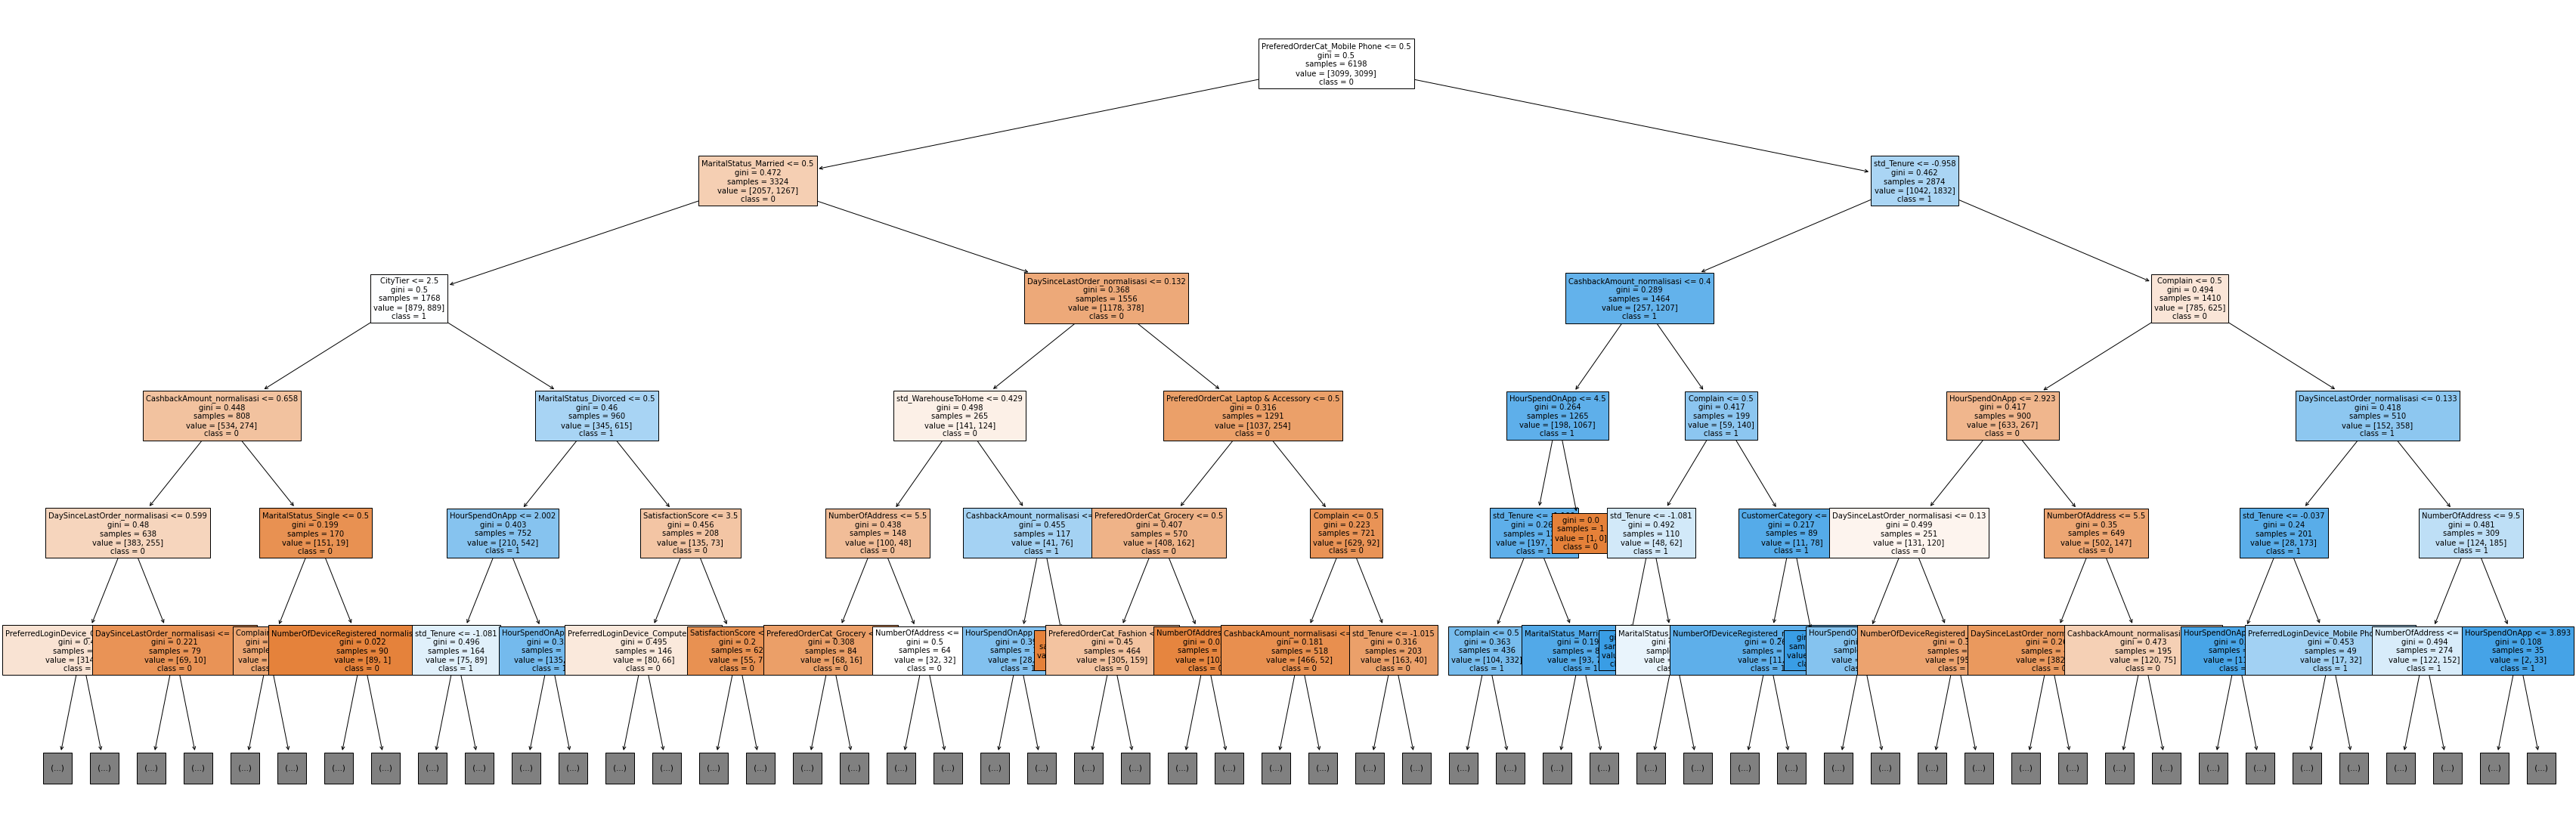

In [88]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(60, 20))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [89]:
print('Train score: ' + str(model.score(X_over_SMOTE, y_over_SMOTE))) #recall
print('Test score:' + str(model.score(X_test, y_test))) #recall

Train score: 0.9454662794449823
Test score:0.6466165413533834


Overfitting

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1242,   94],
       [  97,  172]])

- True positive = 1242
- False Negative = 94
- False Positive = 97
- True Negative = 172

Text(0.5, 1.0, 'feature importance score')

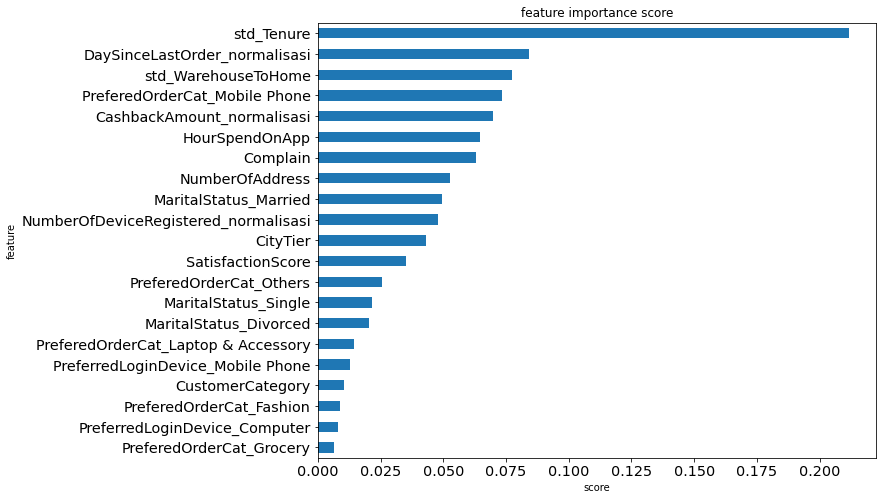

In [91]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

<b> Overfit setelah dilakukan hyperparameter. Trial dengan model algoritma lain. 

## D. Bagging: Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.88
Recall (Test Set): 0.83
F1-Score (Test Set): 0.85
AUC: 0.90


In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1309,   45],
       [  30,  221]])

- True positive = 1309
- False Negative = 45
- False Positive = 30
- True Negative = 221

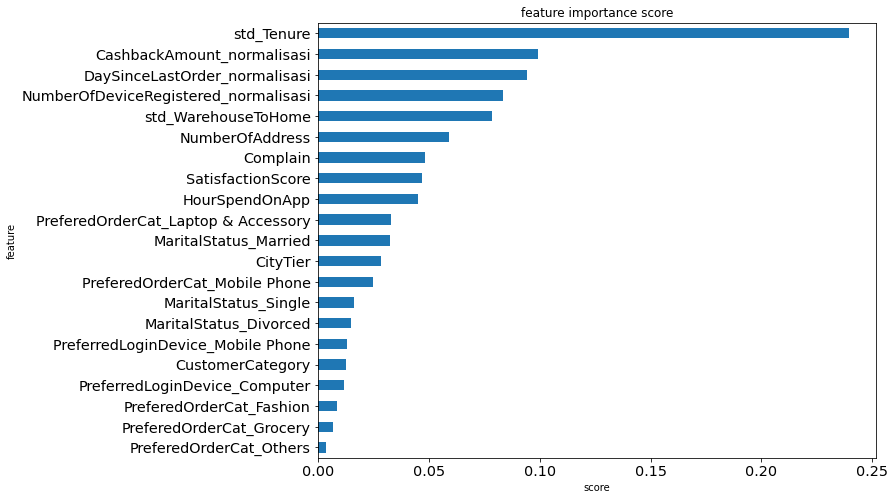

In [94]:
show_feature_importance(rf)

<b> Very Good. 
Recall score sudah mencapai 0,82, precision  0,92 dan F1 score 0,86. model ini dapat digunakan sebagai Alternatif. 

### Hyperparameter tuning with RandomizedSearch

In [95]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.87
Recall (Test Set): 0.84
F1-Score (Test Set): 0.86
AUC: 0.91


In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1307,   43],
       [  32,  223]])

- True positive = 1307
- False Negative = 43
- False Positive = 32
- True Negative = 223

In [97]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


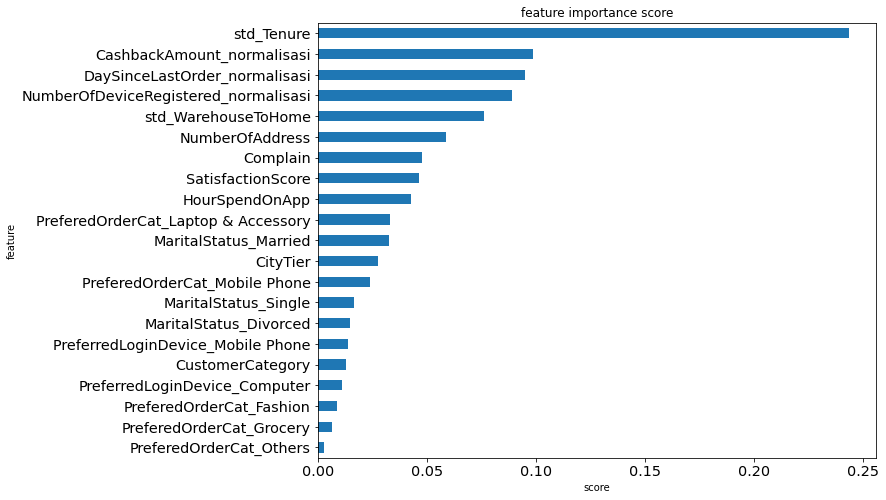

In [98]:
show_feature_importance(rf_tuned.best_estimator_)

## E. Boosting: AdaBoost

In [99]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.62
Recall (Test Set): 0.80
F1-Score (Test Set): 0.70
AUC: 0.85


In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1208,   54],
       [ 131,  212]])

- True positive = 1208
- False Negative = 54
- False Positive = 131
- True Negative = 212

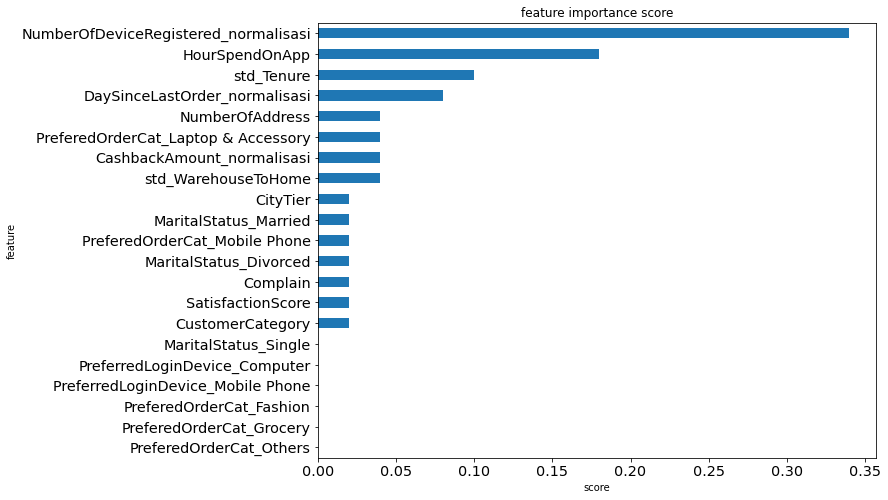

In [101]:
show_feature_importance(ab)

### Hyperparameter Tuning Adaboost

In [102]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model
eval_classification(ab_tuned, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.66
Recall (Test Set): 0.81
F1-Score (Test Set): 0.73
AUC: 0.86


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1230,   51],
       [ 109,  215]])

- True positive = 1230
- False Negative = 51
- False Positive = 109
- True Negative = 215

Perlu dioptimasi dengan model lain. 

In [104]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


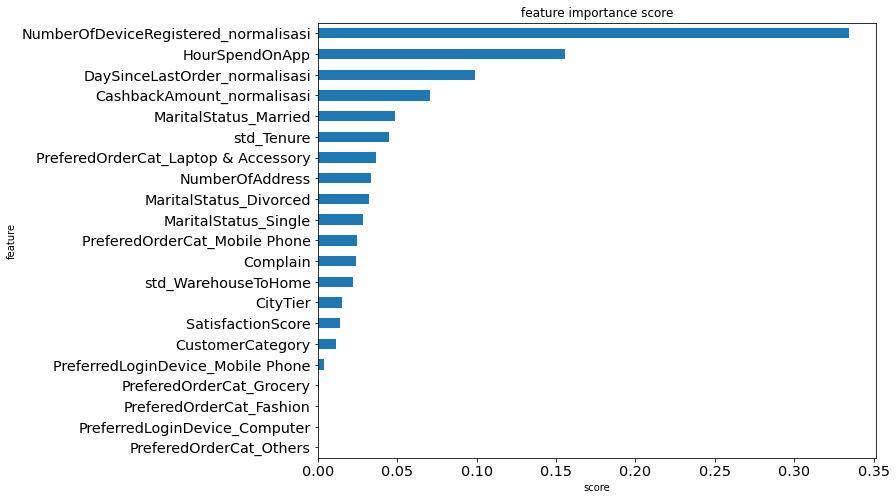

In [105]:
show_feature_importance(ab_tuned.best_estimator_)

## F. Boosting: XGBoost

In [106]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_over_SMOTE, y_over_SMOTE)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.70
Recall (Test Set): 0.79
F1-Score (Test Set): 0.74
AUC: 0.86


In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1248,   56],
       [  91,  210]])

- True positive = 1248
- False Negative = 56
- False Positive = 91
- True Negative = 210

Perlu dioptimasi lagi dengan tuning hyperparameter

#### FEATURE IMPORTANCE

Text(0.5, 1.0, 'feature importance score')

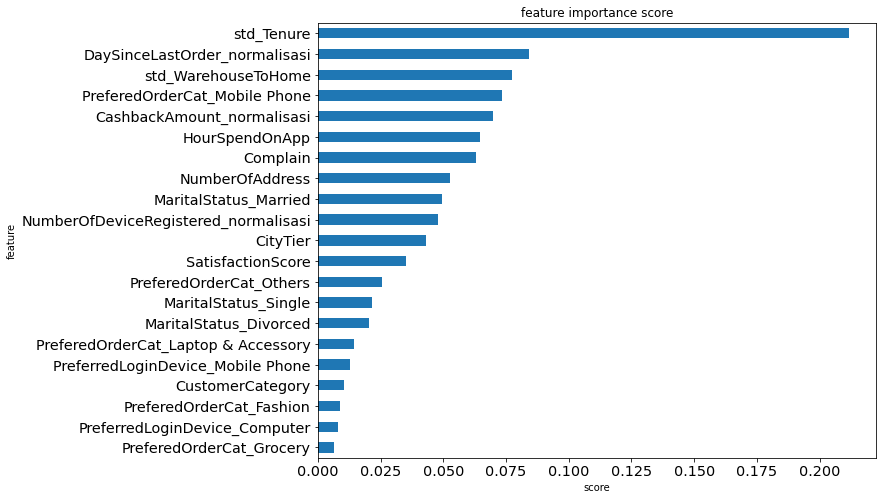

In [108]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## Hyperparameter Tuning

In [109]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.89
Recall (Test Set): 0.86
F1-Score (Test Set): 0.87
AUC: 0.92


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1310,   38],
       [  29,  228]])

- True positive = 1310
- False Negative = 38
- False Positive = 29
- True Negative = 228

Model ini sudah sangat baik. dengan score Recall yang sudah cukup optimum dan score precision yang juga sangat baik. Paduan score ini menjadi XGBoost model sebagai model machine learning yang akan digunakan dalam bisnis. Dengan prinsip FN dan FP sekecilnya-kecilnya. Dengan demikian, retensi pelanggan dapat ditingkatkan sesuai sasaran. 
<b> MODEL INI SUDAH BEST FIT. 

In [111]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 110
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


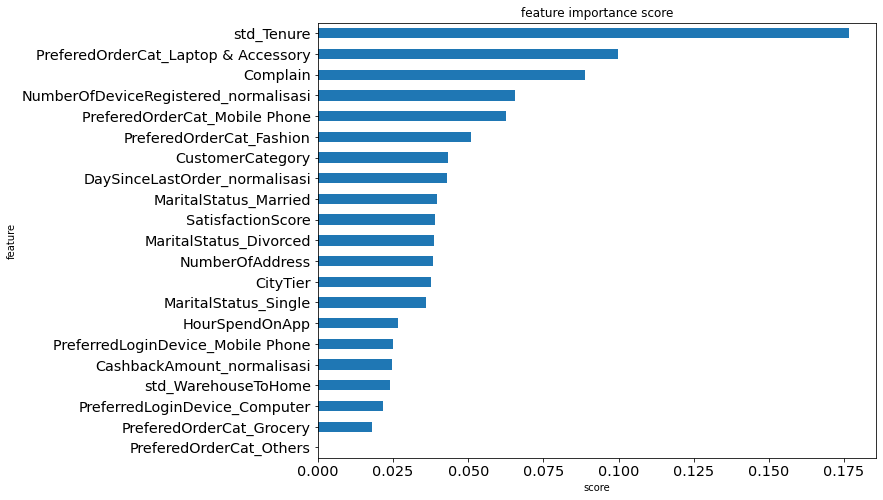

In [112]:
show_feature_importance(xg_tuned.best_estimator_)

# TOP 5 FEATURE

In [130]:
df_retrain =df_z2.copy()
df_retrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Churn                                 5350 non-null   int64  
 1   CityTier                              5350 non-null   int64  
 2   HourSpendOnApp                        5350 non-null   float64
 3   SatisfactionScore                     5350 non-null   int64  
 4   NumberOfAddress                       5350 non-null   int64  
 5   Complain                              5350 non-null   int64  
 6   CashbackAmount_normalisasi            5350 non-null   float64
 7   NumberOfDeviceRegistered_normalisasi  5350 non-null   float64
 8   DaySinceLastOrder_normalisasi         5350 non-null   float64
 9   std_Tenure                            5350 non-null   float64
 10  std_WarehouseToHome                   5350 non-null   float64
 11  MaritalStatus_Div

In [131]:
# pemisahan features vs target
X = df_retrain[[col for col in df_retrain.columns if (str(df_retrain[col].dtype) != 'object') and col not in ['churn_class', 'Churn', 'PreferedOrderCat_Others']]]
y = df_retrain['churn_class'].values
print(X.shape)
print(y.shape)

(5350, 20)
(5350,)


In [132]:
#Splitting the data into Train & Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [133]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

## XGBOOST

In [134]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_over_SMOTE, y_over_SMOTE)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.72
Recall (Test Set): 0.78
F1-Score (Test Set): 0.75
AUC: 0.86


In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1257,   59],
       [  82,  207]])

### HYPERPARAMETER TUNING

In [136]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = xg_tuned.predict(X_test)#Check performa dari model
eval_classification(xg_tuned, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.89
Recall (Test Set): 0.88
F1-Score (Test Set): 0.89
AUC: 0.93


In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[1311,   32],
       [  28,  234]])

# KESIMPULAN DARI MODEL :
- Model yang sudah best fit adalah XGBOOST dengan tuning hyperparameter. score Precision (Test Set): 0.90 dan Recall (Test Set): 0.86. Model ini dapat digunakan sebagai model machine learning untuk bisnis kita. Dengan prinsip FN dan FP sekecilnya-kecilnya. Dengan demikian, retensi pelanggan dapat ditingkatkan dan operational cost untuk tujuan tersebut sesuai sasaran.

# Business Insight & Recommendation

- Karena `Tenure` merupakan feature terpenting dalam model, dan juga dilihat dari churn rate tertinggi ada di customer yg tenure nya rendah jadi bisa menggunakan stategi membuat fitur baru dalam layanan e-commerce seperti 'Gaining Poin or Coin' atau game mengumpulkan coin/poin tersebut yang nantinya dapat ditukar untuk meningkatkan rasa penasaran, experience dan ambisi dari customer sehingga dapat meningkatkan retensi dari pelanggan. Point/coin ini nantinya dapat ditukar dengan voucher gratis ongkir contohnya, atau cashback dan lain-lain. 
- Semakin banyak jumlah pesanan/order, semakin banyak kupon yang digunakan oleh customer. jadi, jumlah order produk itu sangat ditentukan oleh kupon yang kita berikan, oleh karena itu kita harus tetap memberikan kupon kepada customer dengan mempertimbangkan ROI, BEP dll agar customer tetap setia dan rutin dalam melakukan pemesanan produk.
- Mayoritas dari customer yang menggunakan cashback adalah customer dengan lama menggunakan layanan kita kurang dari 21 bulan. dan customer yang sudah memperoleh cashback lebih cenderung churn. fenomena ini bisa menjadi pertimbangan dalam pemberian cashback kepada pelanggan. Sungguh disayangkan kita sudah mengalirkan dana operasional berupa cashback kepada pelanggan, dan pelanggan justru churn, karena pelanggan hanya ingin mengambil cashback selama melakukan pembelian di layanan e commerce kita. Terlihat jelas bahwa customer yang melakukan order hanya 1 kali, juga paling banyak menggunakan cashback. Kemungkinan memang customer ini hanya ingin mengambil keutungan berupa cashback yang besar sebagai new user. Untuk melakukan akusisi pelanggan baru, juga perlu mempertimbangkan bagaimana cara meningkatkan retensi mereka. Perlu adanya fitur farming/game yang hasilnya dapat ditukarkan dengan syarat, atau pengumpulan poin dari hasil pembelian produk dan lain-lain. dengan demikian, hal ini dapat meningkatkan retensi dan loyalitas dari new customer.
- Selain itu, kita juga bisa memberikan rekomendasi bisnis dengan meningkatkan penawaran produk ecommerce pada customer sesuai usia, gender, dll., serta membuat fast call service untuk penanganan masalah produk dengan cepat yang bertujuan untuk retensi pelanggan.
